# Data Wrangling and Analysis of:
## 2020 Medicare Healthcare Associated Infections (HAI).

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Part   I: Data Wrangling</a></li>
    <ul>
    <li><a href="#gather">Gathering</a></li>
    <li><a href="#assess">Assessing</a></li>
    <li><a href="#clean">Cleaning</a></li>
    </ul>

<li><a href="#analysis">Part   II: Exploration Data Analysis</a></li>
    <ul>
    <li><a href="#Univariate">Univariate</a></li>
    <li><a href="#Bivariate">Bivariate</a></li>
    <li><a href="#Multivariate">Multivariate</a></li>
    </ul>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
### Introduction:

Healthcare-Associated Infections (HAIs) are among the leading causes of death in the United States. HAIs put the patient at risk, increase the days of hospitalization required for patients and add to healthcare costs. HAIs are largely preventable with widely publicized interventions, such as better hygiene and advanced scientifically tested techniques for surgical patients. 

HAI measure data are collected by the Centers for Disease Control and Prevention (CDC) via the National Healthcare Safety Network (NHSN) tool. Hospitals must enroll and complete NHSN training to comply with the Centers for Medicare & Medicaid Services (CMS) Hospital Inpatient Quality Reporting (IQR) Program HAI requirements.

The Healthcare-Associated Infections Measures are:
- `HAI-1` : Central line-associated bloodstream infections (CLABSI) in ICUs and select wards (alternate Measure ID: HAI_1_SIR)
- `HAI-2` : Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards (alternate Measure ID: HAI_2_SIR)
- `HAI-3` : Surgical Site Infection from colon surgery (SSI: Colon) (alternate Measure ID: HAI_3_SIR)
- `HAI-4` : Surgical Site Infection from abdominal hysterectomy (SSI: Hysterectomy) (alternate Measure ID: HAI_4_SIR)
- `HAI-5` : Methicillin-resistant Staphylococcus aureus (or MRSA) blood laboratory-identified events (bloodstream infections) (alternate Measure ID: HAI_5_SIR)
- `HAI-6` : Clostridium difficile (C.diff.) laboratory identified events (intestinal infections) (alternate Measure ID: HAI_6_SIR)

The HAI Dataset among others are available in the <a href="https://www.medicare.gov/">Medicare web site</a> which is a national health insurance program in the United States, begun in 1966 under the Social Security Administration (SSA) and now administered by the Centers for Medicare and Medicaid Services (CMS). It primarily provides health insurance for Americans aged 65 and older, but also for some younger people with disability status as determined by the Social Security Administration, as well as people with end stage renal disease and amyotrophic lateral sclerosis (ALS or Lou Gehrig's disease).

The footnotes for our dataset is available as a separate csv file with our dataset and it contain the footnote numbers associated with the Hospital Compare quality measures.

In this project we are going to <a href="#wrangling">wrangle</a> and <a href="#analysis">analyze</a> the Healthcare Associated Infections - Hospital Dataset then we'll assess and clean it, finally we'll analyze the cleaned version where we'll try to see the relationship between different metrics in order to answer the following questions:

- What are the most common Healthcare Associated Infections?
- Is there any HAI better avoided than others?
- What is the distribution of those infections per states?
- Is the number of operations, predicted cases, lower and upper confidence levels good predictors of the observed ones?
- What are the main features that affect the benchmarking?
- What states have the best benchmarked hospitals and what states have the worst ones?.


Before we start, Let's import the necessary libraries and prepare our envirement.

In [1]:
# Data Manipulation packages
import pandas as pd
import numpy as np

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Style
import matplotlib.style as style
style.use('ggplot')


%matplotlib inline

<a id='wrangling'></a>
### Part   I: Data Wrangling:

<a id="gather"></a>
<ul><li><h3>Gathering</h4></li></ul>

Loading the `Healthcare Associated Infections - Hospital.csv` file into a DataFrame and printing the first few lines.

In [2]:
# loading the Healthcare Associated Infections - Hospital csv file into a DataFrame
df = pd.read_csv('Healthcare Associated Infections - Hospital.csv')

# Printing the first few lines to Check if the file was imported correctly
df.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_CILOWER,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,0.787,NaN,04/01/2018,03/31/2019
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_CIUPPER,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,2.761,NaN,04/01/2018,03/31/2019
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_DOPC,Central Line Associated Bloodstream Infection:...,No Different than National Benchmark,6631,NaN,04/01/2018,03/31/2019
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_ELIGCASES,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,6.456,NaN,04/01/2018,03/31/2019
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,10,NaN,04/01/2018,03/31/2019


Loading the `Footnotes.csv` file into a DataFrame and printing the first few lines.

In [3]:
# loading the Footnotes csv file into a DataFrame
notes = pd.read_csv('Footnotes.csv')

# Printing the first few lines to Check if the file was imported correctly
notes.head()

,Footnote,Footnote Text
0,1,The number of cases/patients is too few to rep...
1,2,Data submitted were based on a sample of cases...
2,3,Results are based on a shorter time period tha...
3,4,Data suppressed by CMS for one or more quarters.
4,5,Results are not available for this reporting p...


<a id="assess"></a>
<ul><li><h3>Assessing</h4></li></ul>

`Healthcare Associated Infections - Hospital.csv` Dataset

- Visual assessment

In [4]:
df

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_CILOWER,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,0.787,NaN,04/01/2018,03/31/2019
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_CIUPPER,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,2.761,NaN,04/01/2018,03/31/2019
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_DOPC,Central Line Associated Bloodstream Infection:...,No Different than National Benchmark,6631,NaN,04/01/2018,03/31/2019
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_ELIGCASES,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,6.456,NaN,04/01/2018,03/31/2019
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,10,NaN,04/01/2018,03/31/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170347,670128,BAYLOR SCOTT & WHITE MEDICAL CENTER PFLUGERVILLE,2600 EAST PFLUGERVILLE PARKWAY,PFLUGERVILLE,TX,78660,TRAVIS,(512) 654-6100,HAI_6_CIUPPER,Clostridium Difficile (C.Diff): Upper Confiden...,Not Available,Not Available,13,04/01/2018,03/31/2019
170348,670128,BAYLOR SCOTT & WHITE MEDICAL CENTER PFLUGERVILLE,2600 EAST PFLUGERVILLE PARKWAY,PFLUGERVILLE,TX,78660,TRAVIS,(512) 654-6100,HAI_6_DOPC,Clostridium Difficile (C.Diff): Patient Days,Not Available,365,3,04/01/2018,03/31/2019
170349,670128,BAYLOR SCOTT & WHITE MEDICAL CENTER PFLUGERVILLE,2600 EAST PFLUGERVILLE PARKWAY,PFLUGERVILLE,TX,78660,TRAVIS,(512) 654-6100,HAI_6_ELIGCASES,Clostridium Difficile (C.Diff): Predicted Cases,Not Available,0.089,3,04/01/2018,03/31/2019
170350,670128,BAYLOR SCOTT & WHITE MEDICAL CENTER PFLUGERVILLE,2600 EAST PFLUGERVILLE PARKWAY,PFLUGERVILLE,TX,78660,TRAVIS,(512) 654-6100,HAI_6_NUMERATOR,Clostridium Difficile (C.Diff): Observed Cases,Not Available,0,3,04/01/2018,03/31/2019


- programmatic Assessement:



Checking for nulls and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170352 entries, 0 to 170351
Data columns (total 15 columns):
Facility ID             170352 non-null int64
Facility Name           170352 non-null object
Address                 170352 non-null object
City                    170352 non-null object
State                   170352 non-null object
ZIP Code                170352 non-null int64
County Name             170352 non-null object
Phone Number            170352 non-null object
Measure ID              170352 non-null object
Measure Name            170352 non-null object
Compared to National    170352 non-null object
Score                   170352 non-null object
Footnote                74713 non-null object
Start Date              170352 non-null object
End Date                170352 non-null object
dtypes: int64(2), object(13)
memory usage: 19.5+ MB


Checking for duplicated rows

In [6]:
df.duplicated().sum()

0

Checking the distribution of the numerical values

In [7]:
df.describe()

,Facility ID,ZIP Code
count,170352.000000,170352.000000
mean,267447.904691,54087.529374
std,156913.241894,26963.945268
min,10001.000000,603.000000
25%,140170.750000,33015.250000
50%,260022.500000,55434.000000
75%,390198.250000,76115.500000
max,670128.000000,99929.000000


Cheecking for Unique values in each column

In [8]:
for c in df.columns:
    print('------------{}-------------'.format(c))
    
    print(df[c].value_counts())
    

------------Facility ID-------------
231311    36
511316    36
70031     36
240088    36
490050    36
          ..
141330    36
450827    36
500003    36
70005     36
450780    36
Name: Facility ID, Length: 4732, dtype: int64
------------Facility Name-------------
MEMORIAL HOSPITAL                       468
ST JOSEPH HOSPITAL                      252
COMMUNITY MEMORIAL HOSPITAL             252
ST FRANCIS HOSPITAL                     216
SHRINERS HOSPITALS FOR CHILDREN         216
                                       ... 
NORTHERN LIGHT A R GOULD HOSPITAL        36
THE PHYSICIANS' HOSPITAL IN ANADARKO     36
LICKING MEMORIAL HOSPITAL                36
ST ANTHONY SUMMIT MEDICAL CENTER         36
PROVIDENCE MOUNT CARMEL HOSPITAL         36
Name: Facility Name, Length: 4568, dtype: int64
------------Address-------------
100 HOSPITAL DRIVE          252
100 MEDICAL CENTER DRIVE    144
200 HOSPITAL DRIVE          144
ONE HOSPITAL DRIVE          108
1 MEDICAL CENTER DRIVE      108
          

What are the Footnotes associated with the 'Not Available' entries:

In [9]:
df[df['Score'] == 'Not Available']['Footnote'].unique()

array(['13', '12', '5', '19', '3, 13', '3'], dtype=object)

In [10]:
notes_var = ['3', '5', '12', '13', '19']
for var in notes_var:
    print('{}: {}'.format(var, notes[notes['Footnote'] == var]['Footnote Text'].values))

3: ['Results are based on a shorter time period than required.']
5: ['Results are not available for this reporting period.']
12: ['This measure does not apply to this hospital for this reporting period.']
13: ['Results cannot be calculated for this reporting period.']
19: ['Data are shown only for hospitals that participate in the Inpatient Quality Reporting (IQR) and Outpatient Quality Reporting (OQR) programs.']


#### Quality
- `Measure ID` column should contain only 'HAI' and the measure number (1 to 6)
- `Measure Name` column can be lookd up from the 'Measure ID'
- `Facility ID, Facility Name, City, State, County Name, Measure ID, Measure Name` data type should be category
- `Score` is a mix of datatypes int, float and string
- `Compared to National` column should be of type ordered Category
- `Start Date, End Date` columns contain only one unique entry each, therefore they should be omitted.

#### Tidiness
- For a better manipulation, spaces in the column names should be replaced by  '_'

- Each observation is dispached in 6 rows, each with a distinct variable, they should be columns instead


# <a id="clean"></a>
<ul><li><h3>Cleaning</h4></li></ul>

In [96]:
# Making a copy of the dataset
clean_df = df.copy()

#### Tidiness


##### `Column names contain spaces`
- Define: replace the space by underscore _

- Code:

In [97]:
clean_df.columns = clean_df.columns.str.replace(' ', '_')

- Test:

In [98]:
clean_df.columns

Index(['Facility_ID', 'Facility_Name', 'Address', 'City', 'State', 'ZIP_Code',
       'County_Name', 'Phone_Number', 'Measure_ID', 'Measure_Name',
       'Compared_to_National', 'Score', 'Footnote', 'Start_Date', 'End_Date'],
      dtype='object')

##### `multiple variables as rows instead of columns`
- Define: turn the variable rows into colmuns using pivot_table()


- Code:

In [99]:
# Creating a 'vars' column that contain the different variables for each obsrvation
clean_df['vars'] = clean_df.Measure_ID.str.replace('(HAI_\d\_)', '')

# Rewriting the entries of 'Measure_ID' column to represent 1 of the 6 measures
clean_df['Measure_ID'] = clean_df.Measure_ID.str.extract('(HAI_\d)')

# Drop The unecessary 'Measure Name' Column
clean_df = clean_df.drop(columns= ['Measure_Name'])

Rewriting The data in the `Score` column to avoid a mix of data types wich can lead to problems when we apply pivot_table()

In [100]:
def chg_score(x):
    """
    test the data type if it is string it return 0 otherwise float
    """
    # if x is a strings (in our data it's either '--' or 'Not Available')
    if x == '--' or x == 'Not Available':
        return 0
    
    # if x is a number
    else:
        return float(x)
    
clean_df['Score'] = clean_df['Score'].apply(chg_score)

Turn the variables found in the `vars` column into columns with the coresponding score found in `Score`

As an index we'll pass only the columns we are interested in.

In [101]:
clean_df = clean_df.pivot_table(values='Score', index= ['Facility_ID', 'Facility_Name', 'Address',
                                                        'City', 'State','County_Name', 'ZIP_Code',
                                                        'Phone_Number', 'Measure_ID','Compared_to_National'],
                                columns='vars').reset_index()

- Test:

In [102]:
clean_df.head()

vars,Facility_ID,Facility_Name,Address,City,State,County_Name,ZIP_Code,Phone_Number,Measure_ID,Compared_to_National,CILOWER,CIUPPER,DOPC,ELIGCASES,NUMERATOR,SIR
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,HOUSTON,36301,(334) 793-8701,HAI_1,No Different than National Benchmark,0.787,2.761,6631.0,6.456,10.0,1.549
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,HOUSTON,36301,(334) 793-8701,HAI_2,Better than the National Benchmark,0.179,0.808,12643.0,17.134,7.0,0.409
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,HOUSTON,36301,(334) 793-8701,HAI_3,Better than the National Benchmark,0.000,0.597,182.0,5.019,0.0,0.000
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,HOUSTON,36301,(334) 793-8701,HAI_4,No Different than National Benchmark,0.000,1.583,212.0,1.893,0.0,0.000
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,HOUSTON,36301,(334) 793-8701,HAI_5,Better than the National Benchmark,0.008,0.770,95316.0,6.401,1.0,0.156


- Rename the `'CILOWER', 'CIUPPER', 'DOPC', 'ELIGCASES', 'NUMERATOR', 'SIR'` Columns

In [103]:
clean_df = clean_df.rename(columns= {'CILOWER' : 'Low_confidence',
                                     'CIUPPER' : 'Up_confidence',
                                     'DOPC' : 'Num_Day_Op',
                                     'ELIGCASES' : 'Predicted_Cases',
                                     'NUMERATOR' : 'Observed_Cases',
                                     'SIR' : 'Ratio'})

- Test:

In [104]:
clean_df.columns

Index(['Facility_ID', 'Facility_Name', 'Address', 'City', 'State',
       'County_Name', 'ZIP_Code', 'Phone_Number', 'Measure_ID',
       'Compared_to_National', 'Low_confidence', 'Up_confidence', 'Num_Day_Op',
       'Predicted_Cases', 'Observed_Cases', 'Ratio'],
      dtype='object', name='vars')

##### Data Types
- Define: Fix The columns data types

- Code:

Deffining the function that change the columns type

In [105]:
def chg_type(cols, col_type):
    """
    Takes a list of columns and change their type to col_type
    """
    for col in cols:
        clean_df[col] = clean_df[col].astype(col_type)
        

Deffining a dictionary with a list of different columns as value and the apropriate data type as a key, and then calling the chg_type function with each entry.

In [106]:
cols = {'int' : ['Num_Day_Op', 'Observed_Cases', ], 
        'float' : ['Low_confidence', 'Up_confidence', 'Predicted_Cases'],
       'category' : ['Facility_ID', 'Facility_Name', 'City', 'State', 'County_Name', 'Measure_ID', 'Compared_to_National'], 
        'str': ['Address', 'ZIP_Code', 'Phone_Number']
       }

for cat in cols:
    chg_type(cols[cat], cat)

- Test:

In [107]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28392 entries, 0 to 28391
Data columns (total 16 columns):
Facility_ID             28392 non-null category
Facility_Name           28392 non-null category
Address                 28392 non-null object
City                    28392 non-null category
State                   28392 non-null category
County_Name             28392 non-null category
ZIP_Code                28392 non-null object
Phone_Number            28392 non-null object
Measure_ID              28392 non-null category
Compared_to_National    28392 non-null category
Low_confidence          28392 non-null float64
Up_confidence           28392 non-null float64
Num_Day_Op              28392 non-null int32
Predicted_Cases         28392 non-null float64
Observed_Cases          28392 non-null int32
Ratio                   28392 non-null float64
dtypes: category(7), float64(4), int32(2), object(3)
memory usage: 2.6+ MB


### Saving The cleaned DataFrame:

In [108]:
## Saving the DataFrame as a csv file
clean_df.to_csv('clean_hai_hospitals.csv', index = False)

<a id='analysis'></a>
### Part   II: Data Analysis:



high-level overview of data shape and composition

In [109]:
hospitals = clean_df[['Facility_ID', 'Facility_Name', 'Address', 'City', 'State','County_Name', 'ZIP_Code', 'Phone_Number']]
hospitals = hospitals.drop_duplicates()

print('There are {} rows and {} columns in the cleaned medicare HAI Dataset.'.format(clean_df.shape[0], clean_df.shape[1]))
print('There are {} Hospitals dispatched over {} Cities and {} States.'.format(len(hospitals.Facility_ID.unique()),
                                                                             len(hospitals.City.unique()),
                                                                             len(hospitals.State.unique())))

There are 28392 rows and 16 columns in the cleaned medicare HAI Dataset.
There are 4732 Hospitals dispatched over 2917 Cities and 56 States.


Descriptive statistics for numeric variables

In [110]:
clean_df.describe()

vars,Low_confidence,Up_confidence,Num_Day_Op,Predicted_Cases,Observed_Cases,Ratio
count,28392.000000,28392.000000,28392.000000,28392.000000,28392.000000,28392.000000
mean,0.119346,0.876355,11835.547196,5.430446,3.893209,0.311301
std,0.249793,1.368382,33457.621445,17.350382,13.022822,0.553490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.002000,0.000000,0.000000
50%,0.000000,0.000000,305.500000,0.470000,0.000000,0.000000
75%,0.119000,1.491000,6104.250000,3.169250,2.000000,0.541000
max,5.416000,13.535000,731783.000000,471.015000,441.000000,8.117000


In [92]:
clean_df.iloc[clean_df['Observed_Cases'].idxmax()]

vars
Facility_ID                                                        330101
Facility_Name           NEW YORK-PRESBYTERIAN HOSPITAL-NEW YORK WEILL ...
Address                                              525 EAST 68TH STREET
City                                                             NEW YORK
State                                                                  NY
County_Name                                                      NEW YORK
ZIP_Code                                                            10065
Phone_Number                                               (212) 746-5454
Measure_ID                                                          HAI_6
Compared_to_National                 No Different than National Benchmark
Start_Date                                            2018-04-01 00:00:00
End_Date                                              2019-03-31 00:00:00
Low_confidence                                                      0.857
Up_confidence                    

In [111]:
clean_df.iloc[clean_df['Predicted_Cases'].idxmax()]

vars
Facility_ID                                         100007
Facility_Name                         ADVENTHEALTH ORLANDO
Address                                   601 E ROLLINS ST
City                                               ORLANDO
State                                                   FL
County_Name                                         ORANGE
ZIP_Code                                             32803
Phone_Number                                (407) 303-1976
Measure_ID                                           HAI_6
Compared_to_National    Better than the National Benchmark
Low_confidence                                       0.377
Up_confidence                                        0.496
Num_Day_Op                                          633749
Predicted_Cases                                    471.015
Observed_Cases                                         204
Ratio                                                0.433
Name: 4403, dtype: object

In [112]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28392 entries, 0 to 28391
Data columns (total 16 columns):
Facility_ID             28392 non-null category
Facility_Name           28392 non-null category
Address                 28392 non-null object
City                    28392 non-null category
State                   28392 non-null category
County_Name             28392 non-null category
ZIP_Code                28392 non-null object
Phone_Number            28392 non-null object
Measure_ID              28392 non-null category
Compared_to_National    28392 non-null category
Low_confidence          28392 non-null float64
Up_confidence           28392 non-null float64
Num_Day_Op              28392 non-null int32
Predicted_Cases         28392 non-null float64
Observed_Cases          28392 non-null int32
Ratio                   28392 non-null float64
dtypes: category(7), float64(4), int32(2), object(3)
memory usage: 2.6+ MB


#### What is the structure of our dataset?

4732 Hospitals dispatched over 2917 Cities and 56 States has been evaluated in 6 different Healthcare Associated Infections, which gives us the total of 28392 observations in the dataset with 18 features :
- `Category: `'Facility_ID', 'Facility_Name',  'City', 'State', 'County_Name', 'Measure_ID', 'Compared_to_National'
- `Numeric: `'Low_confidence', 'Up_confidence', 'Num_Day_Op', 'Predicted_Cases', 'Observed_Cases', 'Ratio'
- `String: `'Address', 'ZIP_Code', 'Phone_Number'

#### What are the main features of interest in the dataset?

We are most interested in figuring out the following:
- What are the most common Healthcare Associated Infections?
- Is there any HAI better avoided than others?
- What is the distribution of those infections per states?
- Is the number of operations, predicted cases, lower and upper confidence levels good predictors of the observed ones?
- What are the main features that affect the benchmarking?
- What states have the best benchmarked hospitals and what states have the worst ones?.

#### What features in the dataset will help support our investigation?

I expect that the observed cases affect the benchmarking and the number of patient day or operations `Num_Day_Op` to be the most affecting variable on the number of observed cases.

Let's see how

<a id='Univariate'></a>
#### Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: `Ratio`: The number of observed cases over the number of predicted cases.

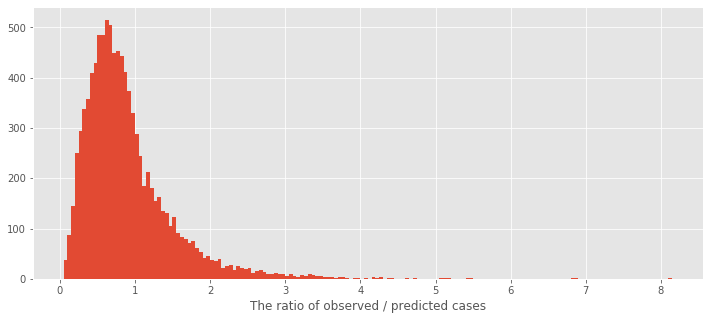

In [130]:
binsize = 0.05
bins = np.arange(0.05, clean_df['Ratio'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = clean_df, x = 'Ratio', bins = bins)
plt.xlabel('The ratio of observed / predicted cases')
plt.show()

Seems that we have a right skewed leptokurtic distribution with a peak between 0 and 1, and a tail up to 4.5 with some outliers after that

In [113]:
positive_cases = clean_df[clean_df['Ratio'] > 0].shape[0]
print('The number of Positive observations is: {}, which represents {} % of our Dataset'.format(positive_cases,
                                                                            round(100 * positive_cases / clean_df.shape[0], 2)))

The number of Positive observations is: 9834, which represents 34.64 % of our Dataset


In [114]:
null_cases = clean_df[clean_df['Ratio'] == 0].shape[0]
print('The number of Null observations is: {}, which represents {} % of our Dataset'.format(null_cases,
                                                                              round(100 * null_cases / clean_df.shape[0], 2)))

The number of Null observations is: 18558, which represents 65.36 % of our Dataset


In [72]:
clean_df[clean_df['Ratio'] > 4].shape[0]

22

In [73]:
clean_df['Ratio'].max()

8.117

Let's Plot the histogram of The Observed cases

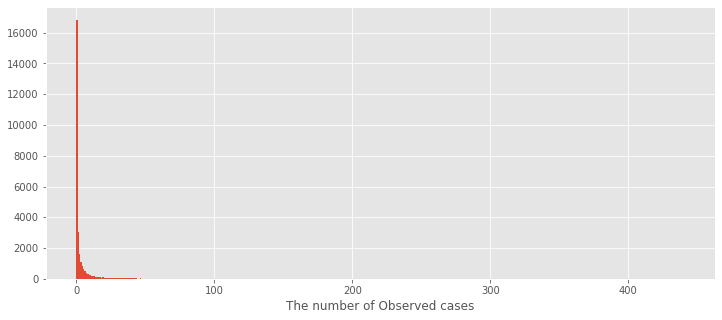

In [129]:
binsize = 1
bins = np.arange(clean_df['Observed_Cases'].min(), clean_df['Observed_Cases'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = clean_df, x = 'Observed_Cases', bins = bins)

plt.xlabel('The number of Observed cases')
plt.show()

Let's plot the histogram on a log-scale for a better visualization

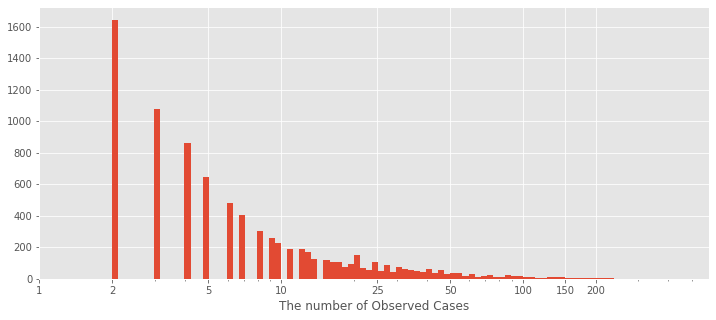

In [128]:
# there's some kind of a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0.25, np.log10(clean_df['Observed_Cases'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = clean_df, x = 'Observed_Cases', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 25, 50, 100, 150, 200], [1, 2, 5, 10, 25, 50, 100, 150, 200])
plt.xlabel('The number of Observed Cases')
plt.show()

In [273]:
positive_observations = clean_df.query('Observed_Cases > 0 and Predicted_Cases > 0 and Num_Day_Op > 0')

print('The minimum observed cases is: {}, The maximum is {}.'.format(positive_observations['Observed_Cases'].min(),
                                                                              positive_observations['Observed_Cases'].max()))

The minimum observed cases is: 1, The maximum is 441.


In [123]:
clean_df.Observed_Cases.value_counts()

0      16831
1       3074
2       1642
3       1080
4        862
       ...  
358        1
110        1
78         1
119        1
223        1
Name: Observed_Cases, Length: 162, dtype: int64

The Higher the number of observed cases the lower the occurrences, 
The majority of observed cases are bellow 50 with a peak at the minimum of 1 case.

Let's see the distribution of predicted cases with its lower and upper confidence levels.

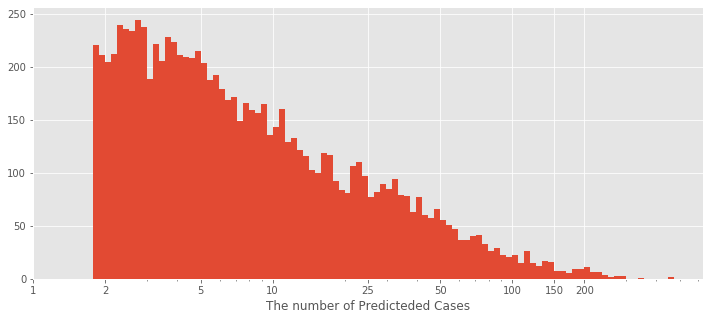

In [127]:
log_binsize = 0.025
bins = 10 ** np.arange(0.25, np.log10(clean_df['Predicted_Cases'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = clean_df, x = 'Predicted_Cases', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 25, 50, 100, 150, 200], [1, 2, 5, 10, 25, 50, 100, 150, 200])
plt.xlabel('The number of Predicteded Cases')
plt.show()

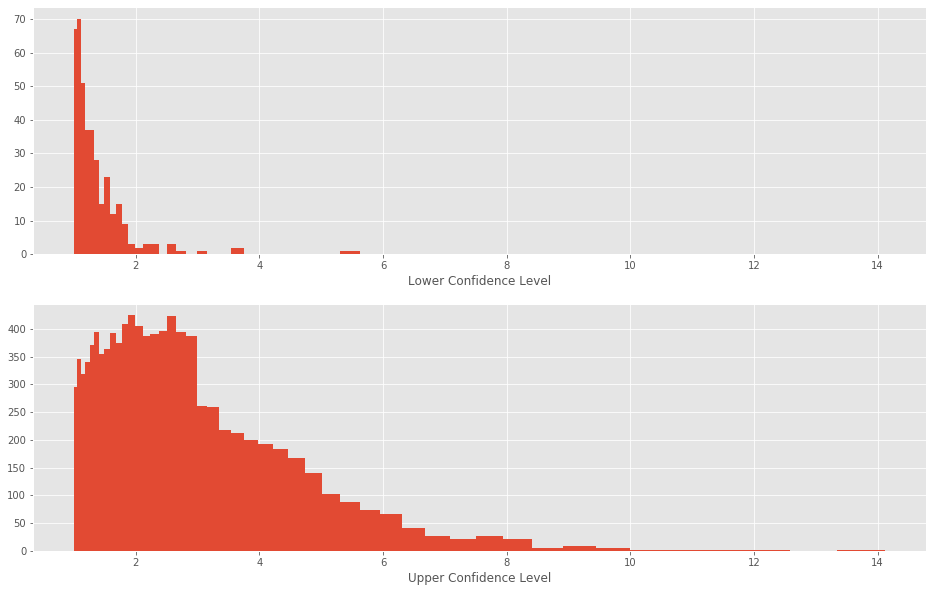

In [159]:
fig, ax = plt.subplots(nrows=2, figsize = [16,10])
bins = 10 ** np.arange(0, np.log10(clean_df['Up_confidence'].max())+0.025, 0.025)

ax[0].hist(data = clean_df, x = 'Low_confidence', bins = bins)
ax[0].set_xlabel('Lower Confidence Level')
ax[1].hist(data = clean_df, x = 'Up_confidence', bins = bins)
ax[1].set_xlabel('Upper Confidence Level')

plt.show()

In [79]:
Predicted_observations = clean_df.query('Predicted_Cases > 0')
print('The minimum Predicted cases is: {}, The maximum is {}.'.format(Predicted_observations['Predicted_Cases'].min(),
                                                                              Predicted_observations['Predicted_Cases'].max()))

The minimum Predicted cases is: 0.001, The maximum is 471.015.


Lower cases are the most predicted, but the number may go up to 471 cases,


What about the number of patient day or operations

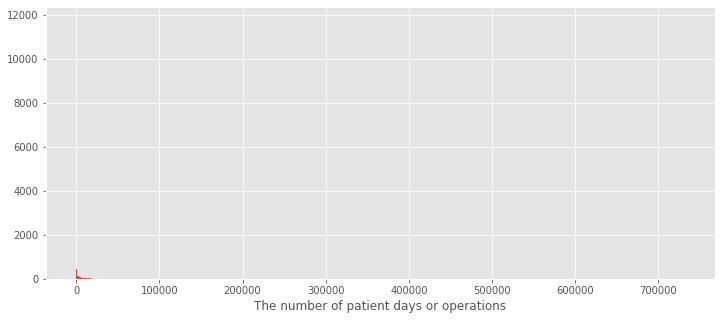

In [163]:
binsize = 100
bins = np.arange(clean_df['Num_Day_Op'].min(), clean_df['Num_Day_Op'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = clean_df, x = 'Num_Day_Op', bins = bins)

plt.xlabel('The number of patient days or operations')
plt.show()

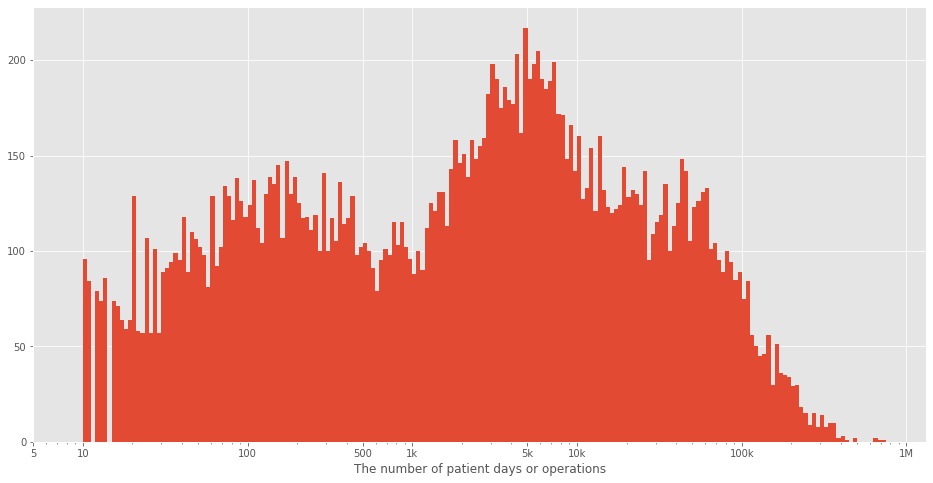

In [167]:
# Let's plot it on log-scale
bins = 10 ** np.arange(1, np.log10(clean_df['Num_Day_Op'].max())+0.025, 0.025)
plt.figure(figsize=[16, 8])
plt.hist(data = clean_df, x = 'Num_Day_Op', bins = bins)
plt.xscale('log')
plt.xticks([5, 10, 100, 500, 1000, 5000, 10000, 100000, 1000000], [5, 10, 100, 500, '1k', '5k', '10k', '100k', '1M'])
plt.xlabel('The number of patient days or operations')
plt.show()

In [172]:
op_100k_plus= clean_df[clean_df['Num_Day_Op'] > 100000].shape[0]
op_100k_plus, op_100k_plus *100/ clean_df.shape[0]

(776, 2.73316427162581)

97 % of our data is for operations under 100 K/ period and seems like a bimodal distribution with one peak between 100 and 500, and another one between 5k and 10k.

what is the distribution of measures with positive observations by their id:

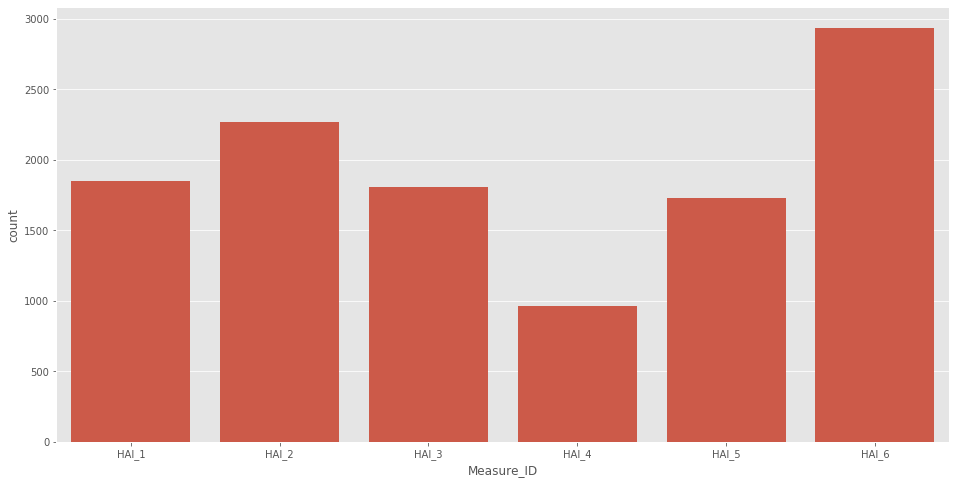

In [80]:
default_color = sns.color_palette()[0]
plt.figure(figsize = [16,8])
sns.countplot(data = positive_observations, x = 'Measure_ID', color = default_color)

plt.show()

Althouth all hospitals are surveyed on the six HA infections, not all infections are equal:

HAI-6: Clostridium difficile (C.diff.) laboratory identified events (intestinal infections) is the most common infection followed by HAI-2: Catheter-associated urinary tract infections.
HAI-4: Surgical Site Infection from abdominal hysterectomy is the least common infection.

what is the distribution of benchmarks:

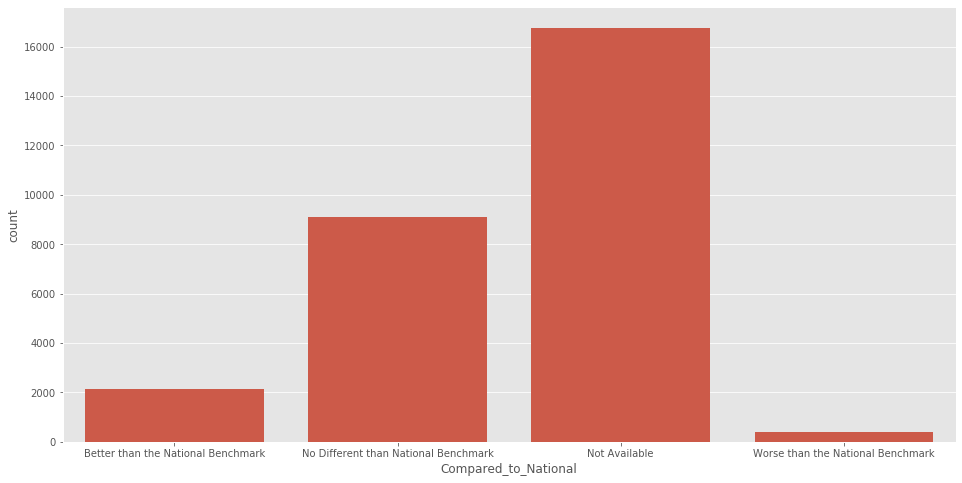

In [176]:
default_color = sns.color_palette()[0]
plt.figure(figsize = [16,8])
sns.countplot(data = clean_df, x = 'Compared_to_National', color = default_color)

plt.show()

In [179]:
clean_df.Compared_to_National.value_counts()

Not Available                           16772
No Different than National Benchmark     9113
Better than the National Benchmark       2126
Worse than the National Benchmark         381
Name: Compared_to_National, dtype: int64

Seems like most hosiptals are not benchmarked yet. For the ones who are the majority are no different than others, however there some 2126 hospitals that have a better benchmark, and 381 that are worse than others. 

What about the distribution of hospitals per state? 

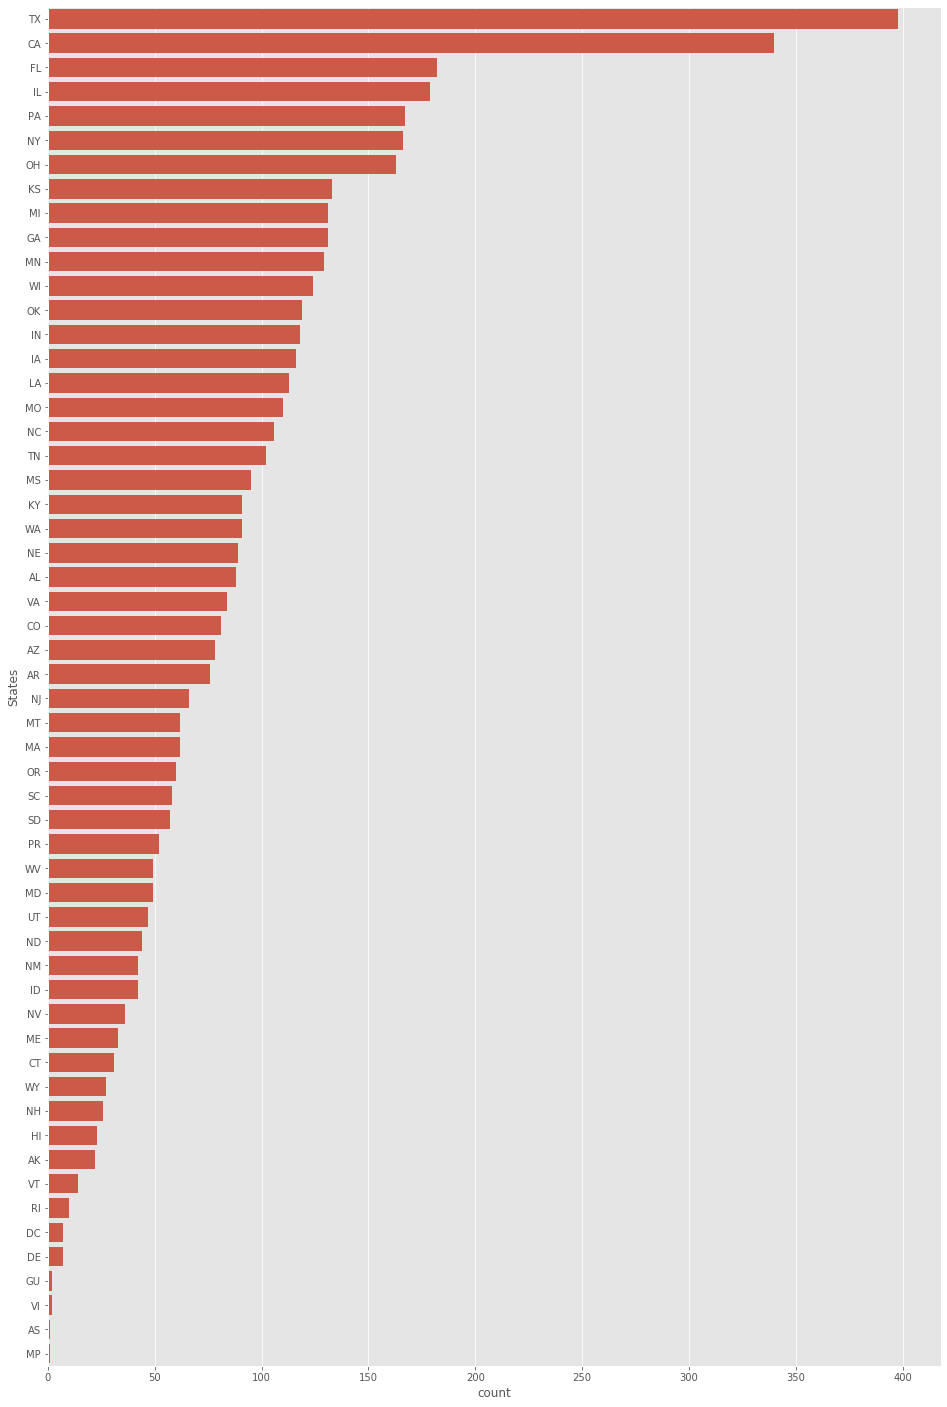

In [82]:
# Sort the states by number of hospitals
hosp_ordered = hospitals.State.value_counts().index

plt.figure(figsize = [16,25])
sns.countplot(data = hospitals, y = 'State', order= hosp_ordered, color = default_color)
plt.ylabel('States')

plt.show()

What states has the highest number of positive observations?

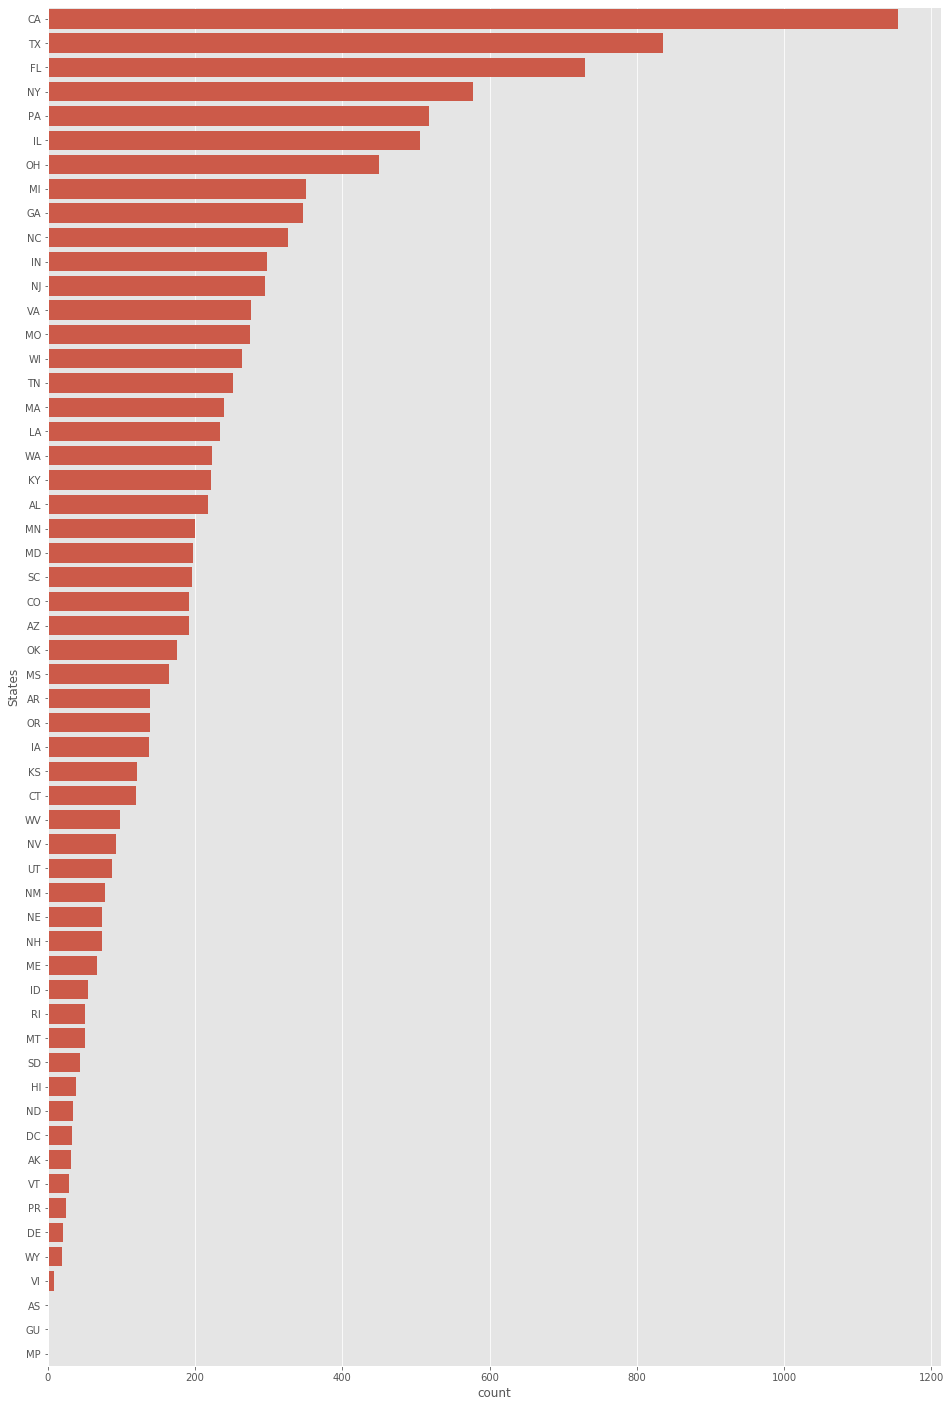

In [83]:
# Sort the states by number by number of positive observations
hosp_Pos_ordered = positive_observations.State.value_counts().index

plt.figure(figsize = [16,25])
sns.countplot(data = positive_observations, y = 'State', order= hosp_Pos_ordered, color = default_color)
plt.ylabel('States')

plt.show()

Texas and california bouth have by far the highest number of hospitals around 400 and 340 respectively, florida comes third by around 175 which is almost half the number of california, however california took the first place for positive observations by around 1175 cases, then texas alittle more than 800, florida around 700, then new york a little bellow 600 cases.



What counties has the highest number of positive observations?

In [181]:
positive_observations.County_Name.value_counts()

LOS ANGELES         307
COOK                196
JEFFERSON           156
MONTGOMERY          143
MARICOPA            118
                   ... 
EASTERN DISTRICT      0
EATON                 0
OTOE                  0
OSBORNE               0
RABUN                 0
Name: County_Name, Length: 1561, dtype: int64

What about cities?

In [85]:
positive_observations.City.value_counts()

CHICAGO         103
HOUSTON          75
LOS ANGELES      73
BALTIMORE        70
PHILADELPHIA     64
               ... 
HUGO              0
HUGOTON           0
HUMBOLDT          0
TUNKHANNOCK       0
ZUNI              0
Name: City, Length: 2917, dtype: int64

Interestingly the county of los angeles has the highest number of positive observations, 111 more than the second county cook, but as a city chicago is first by 103 cases wich is 28 more than los angeles who is in the second place.

Let's do some bivariate explorations to investigate more.

<a id='Bivariate'></a>
#### Bivariate Exploration

In [44]:
numeric_vars = ['Low_confidence', 'Up_confidence', 'Num_Day_Op', 'Predicted_Cases', 'Observed_Cases', 'Ratio']
categoric_vars = ['Measure_ID', 'Compared_to_National']

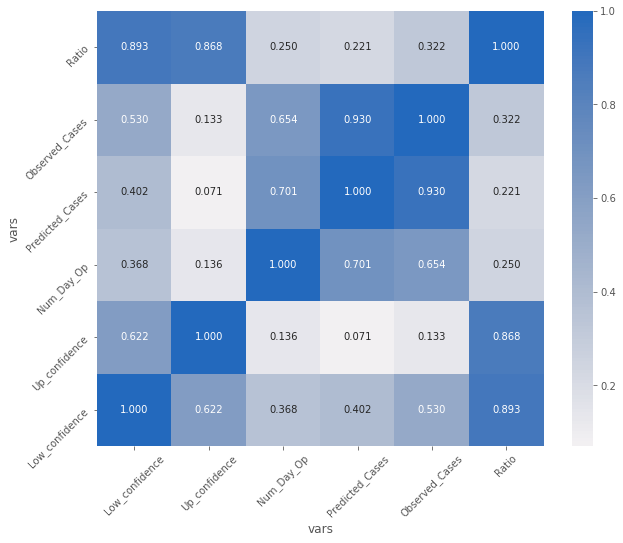

In [53]:
# correlation plot
plt.figure(figsize = [10, 8])
ax= sns.heatmap(clean_df[numeric_vars].corr(),annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0 )
plt.xticks(rotation= 45)
plt.yticks(rotation= 45)
ax.set_ylim([0,6])

plt.show()

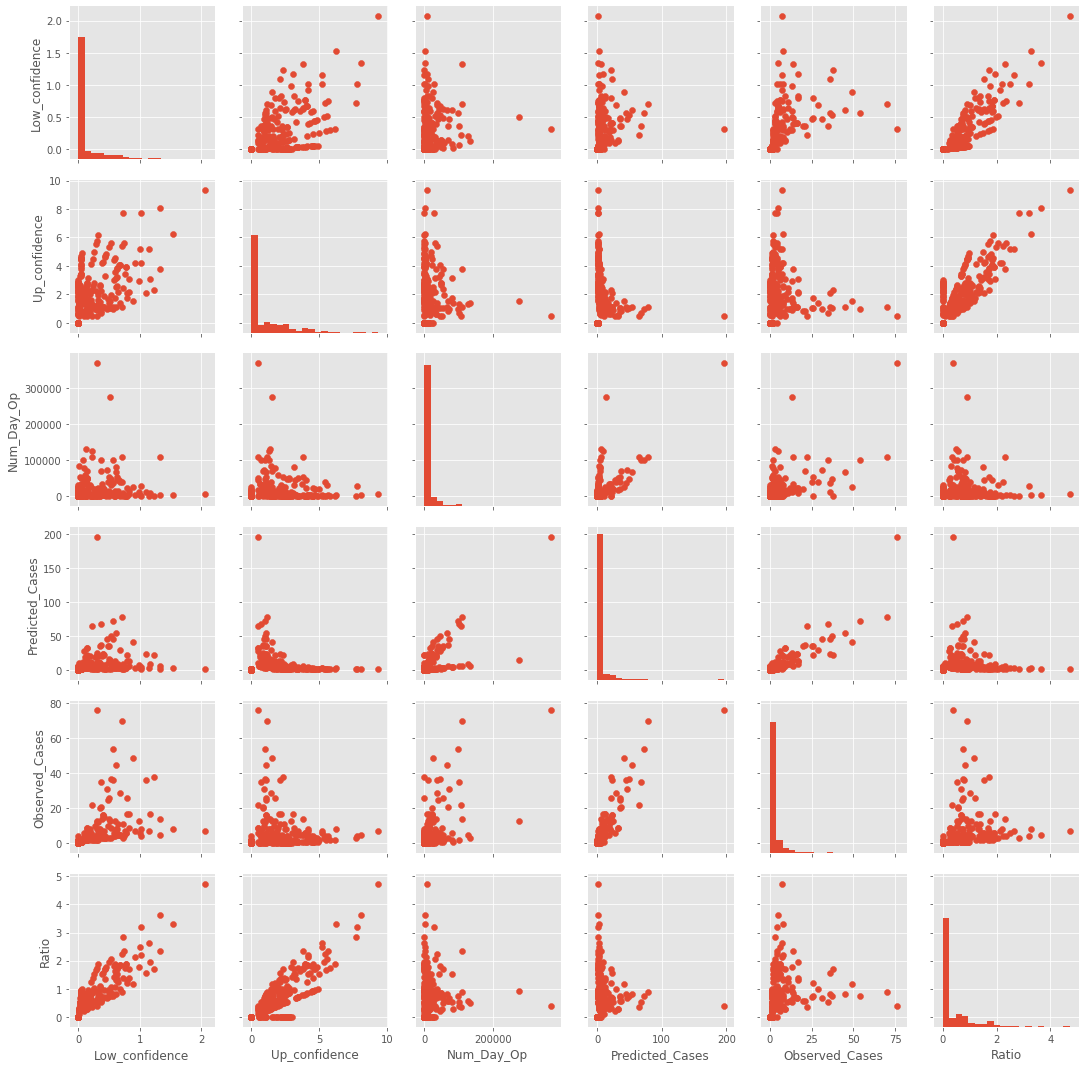

In [29]:
# plot matrix: sample 500 observations so that plots are clearer and
# they render faster
samples = np.random.choice(clean_df.shape[0], 500, replace = False)
observ_samp = clean_df.loc[samples,:]

g = sns.PairGrid(data = observ_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Predicted cases is correlated with num_day_op and highly correlated with Observed cases which is not surprising, the higher the number of patient days or operations the higher should be the predictions, and the higher the predictions the higher the observed cases especially if the confidence levels are hight as well since they are also strongly correlated with the ratio.

Let's see the categorical features vs the numerical ones.


<Figure size 1152x720 with 0 Axes>

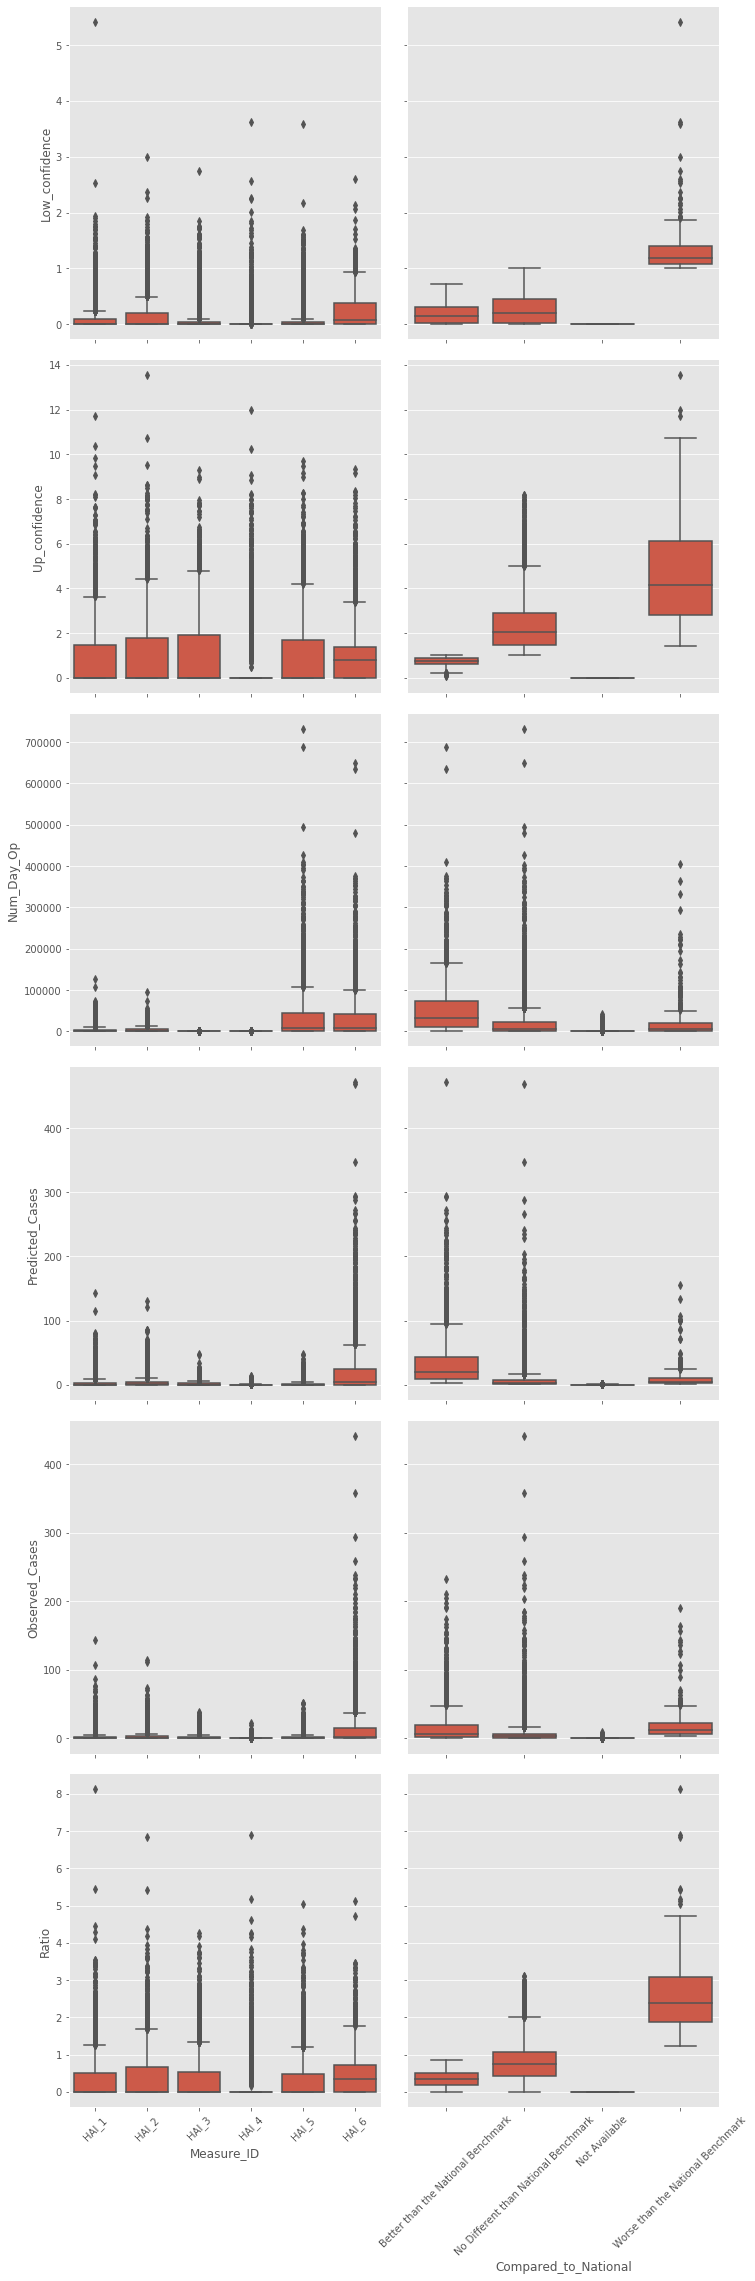

In [67]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation= 45)

plt.figure(figsize = [16, 10])
g = sns.PairGrid(data = clean_df, y_vars = numeric_vars, x_vars = categoric_vars,
                height= 5)
g.map(boxgrid)

plt.show()

Opposed to the worse benchmarked, The best benchmarked facilities have a lower ratio interval and mean, high patient days or operations, a low confidence levels with a highly predicted cases but a lower observed cases mean.

HAI-6 is the most predicted infections and the most observed ones as well, The mean of its ratio is the highest also, The HAI-4 has the lowest distributions in all numerical features.

What is the distribution of benchmarks per measures?

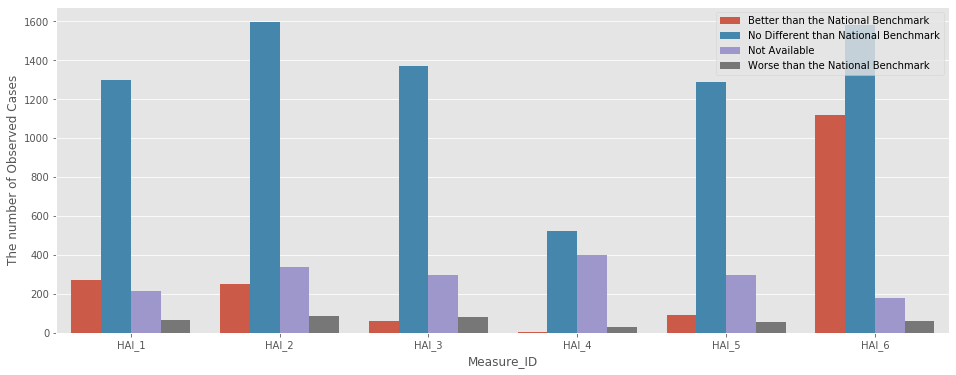

In [86]:
plt.figure(figsize = [16,6])
sns.countplot(data = positive_observations, x= 'Measure_ID', hue = 'Compared_to_National')
plt.legend(loc= 'best')
plt.ylabel('The number of Observed Cases')
plt.show()

Most best benchmarks are for HAI-6, the least if for HAI-4 who have also the least worse benchmarks.

Let's see where thoese infections are most common.

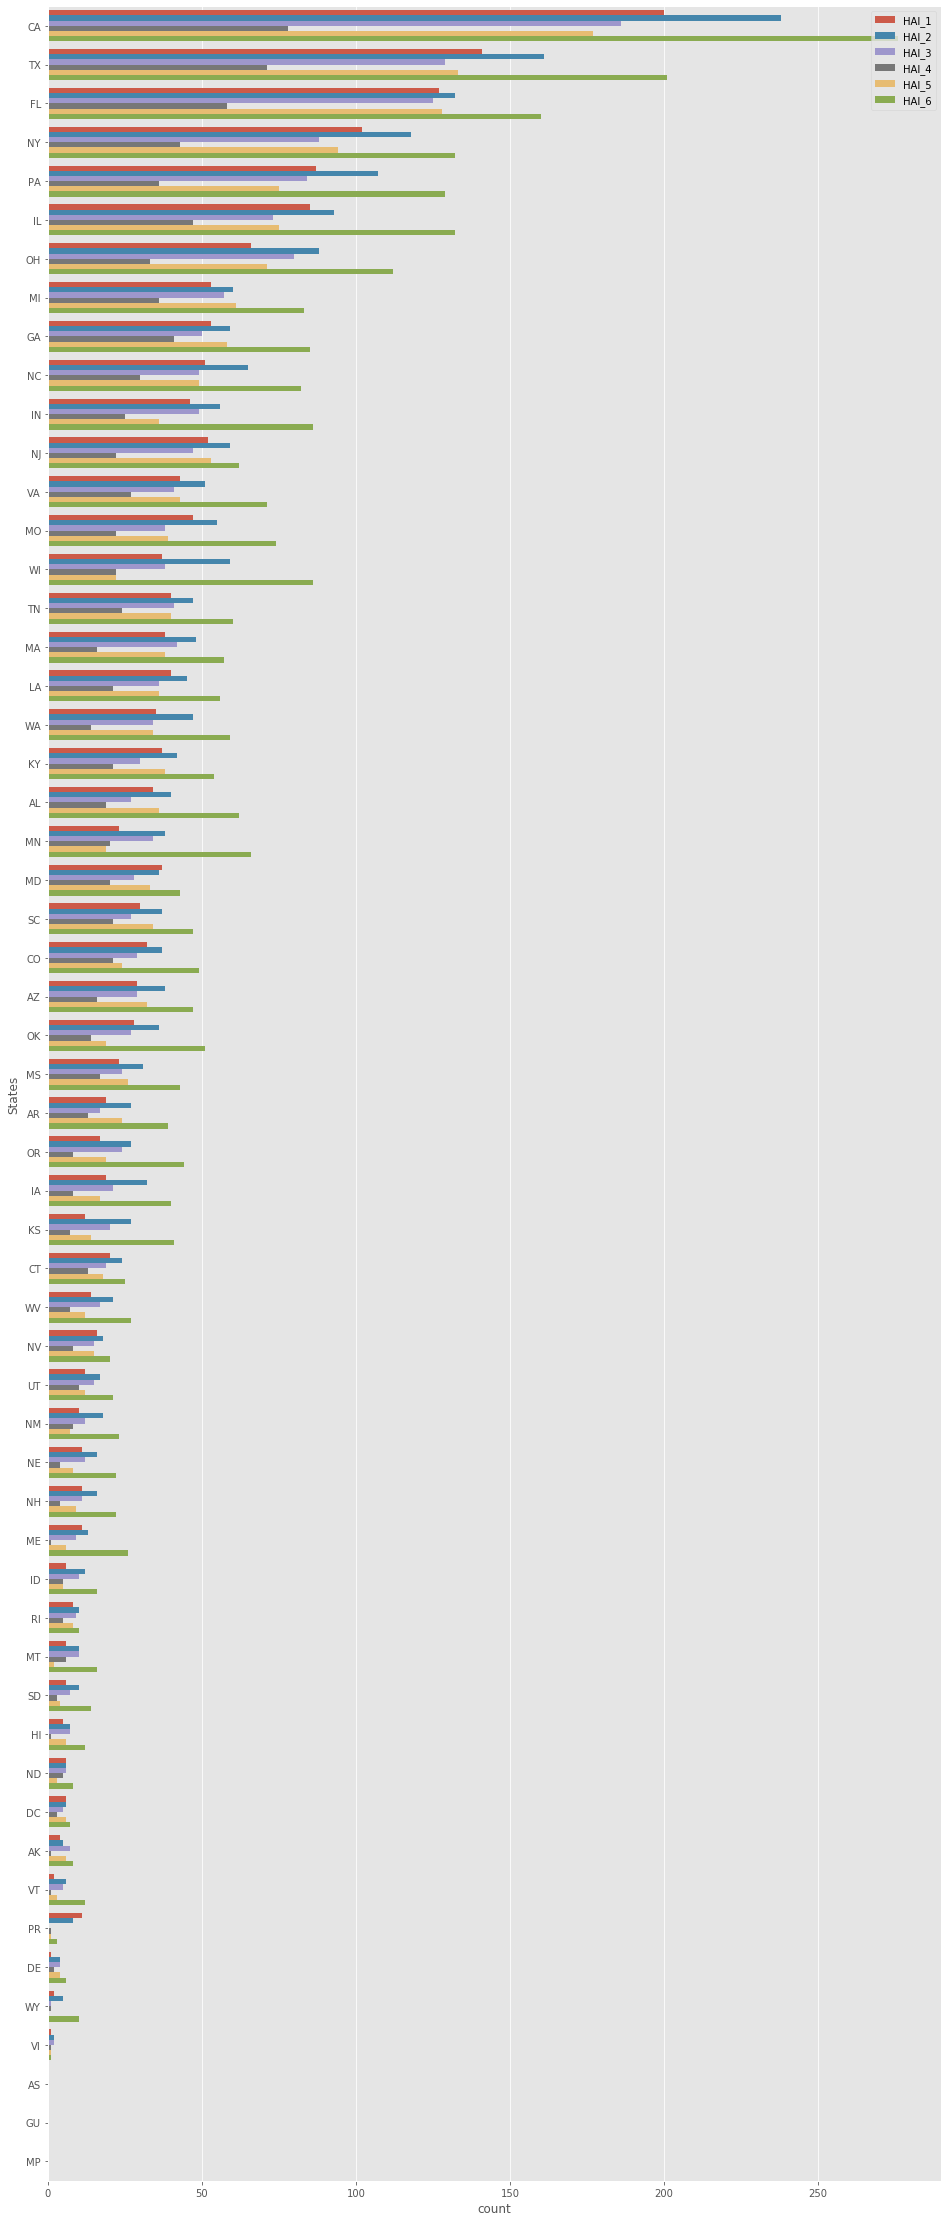

In [187]:
plt.figure(figsize = [16,40])
sns.countplot(data = positive_observations, y = 'State', hue = 'Measure_ID', order= hosp_Pos_ordered)
plt.ylabel('States')
plt.legend(loc= 'upper right')
plt.show()

What states has the best benchmarked hospitals?

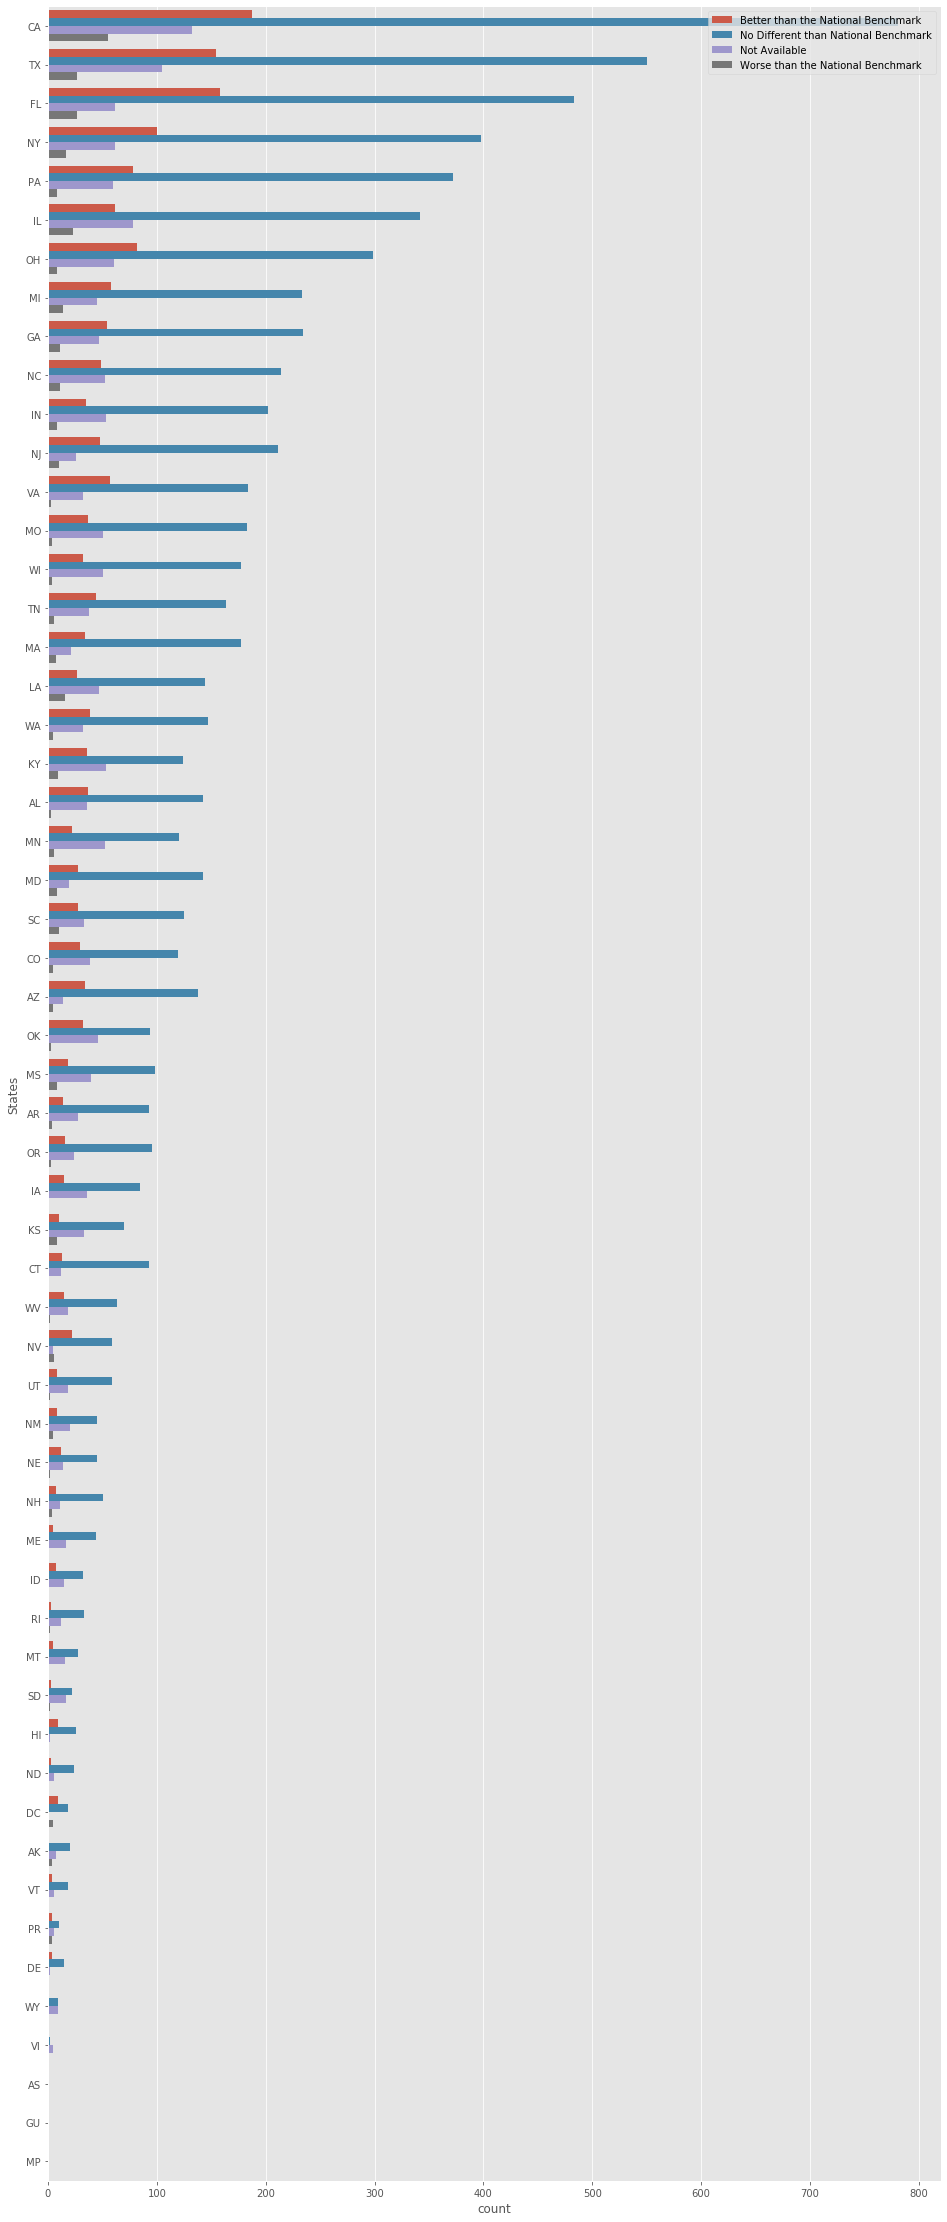

In [188]:
plt.figure(figsize = [16,40])
sns.countplot(data = positive_observations, y = 'State', hue = 'Compared_to_National', order= hosp_Pos_ordered)
plt.ylabel('States')
plt.legend(loc= 'upper right')
plt.show()

What about the observed ratio per state

In [214]:
# Grouping the data by state and taking the mean of numerical values sorted by Ratio
hospitals_mean = clean_df.groupby(by='State').mean()


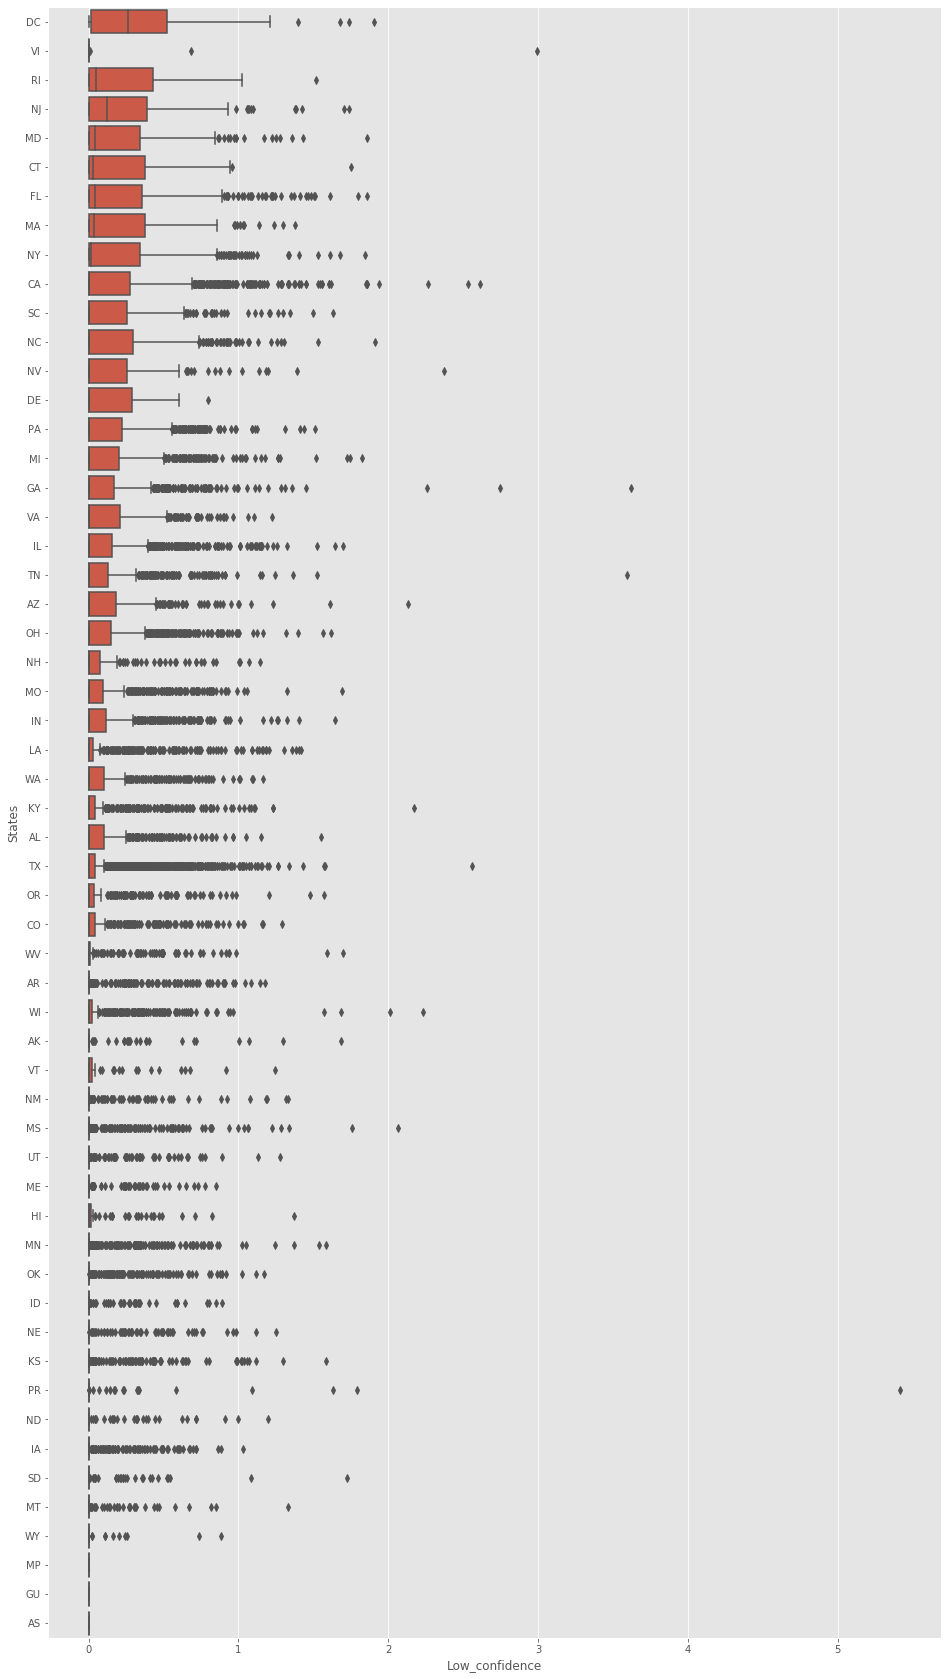

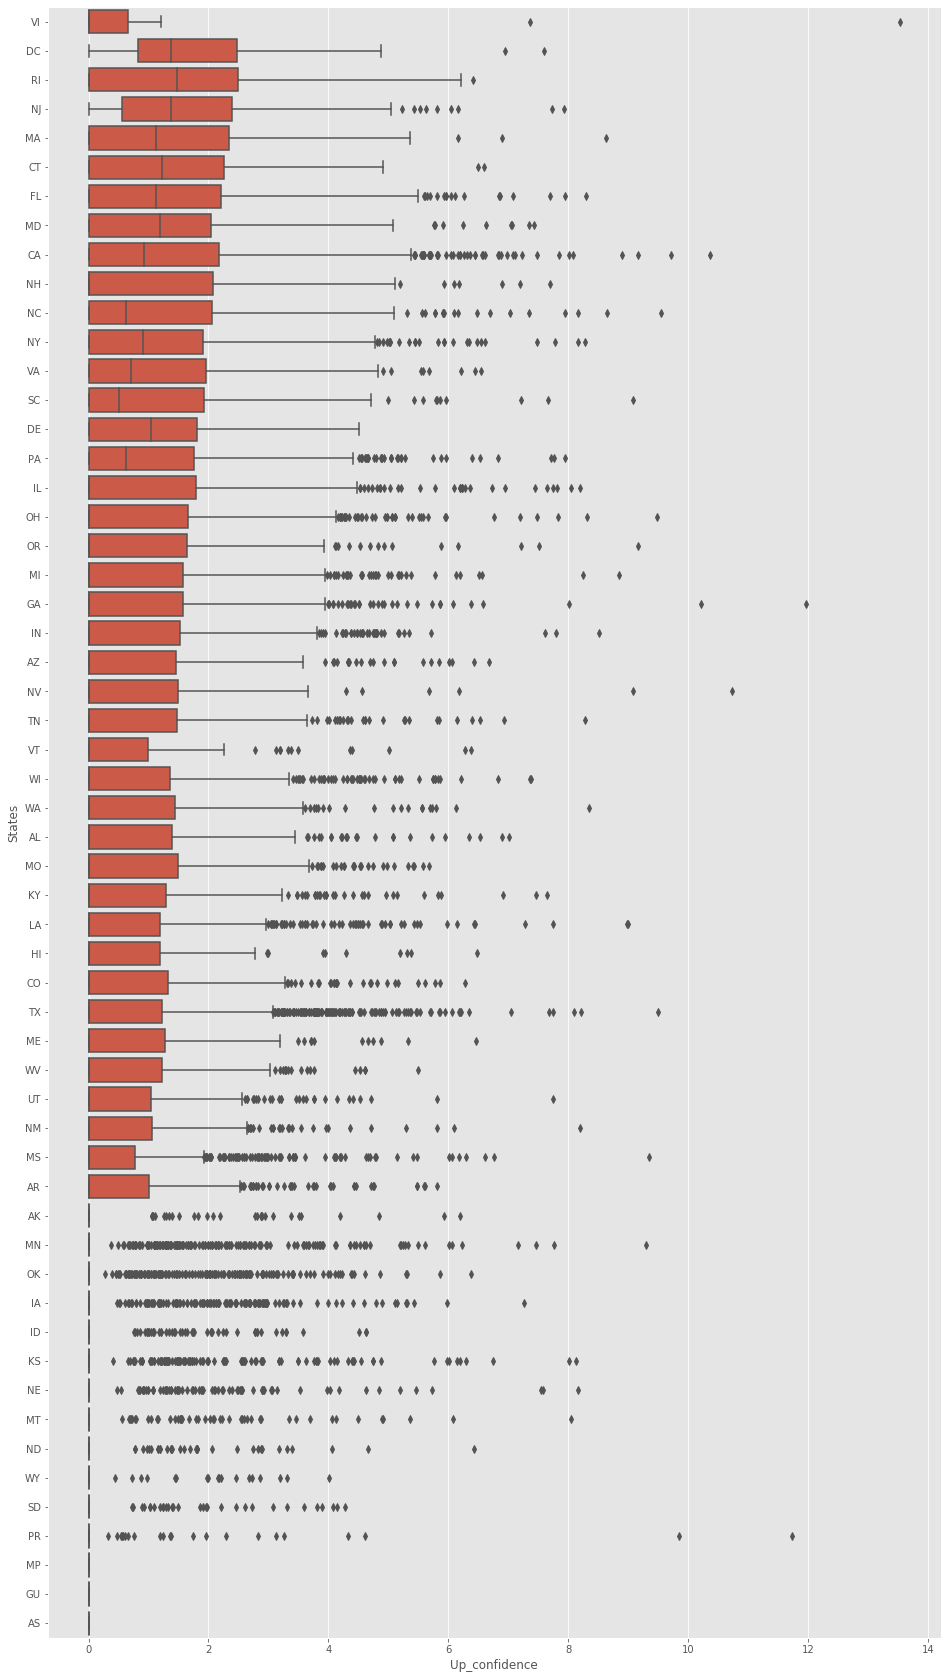

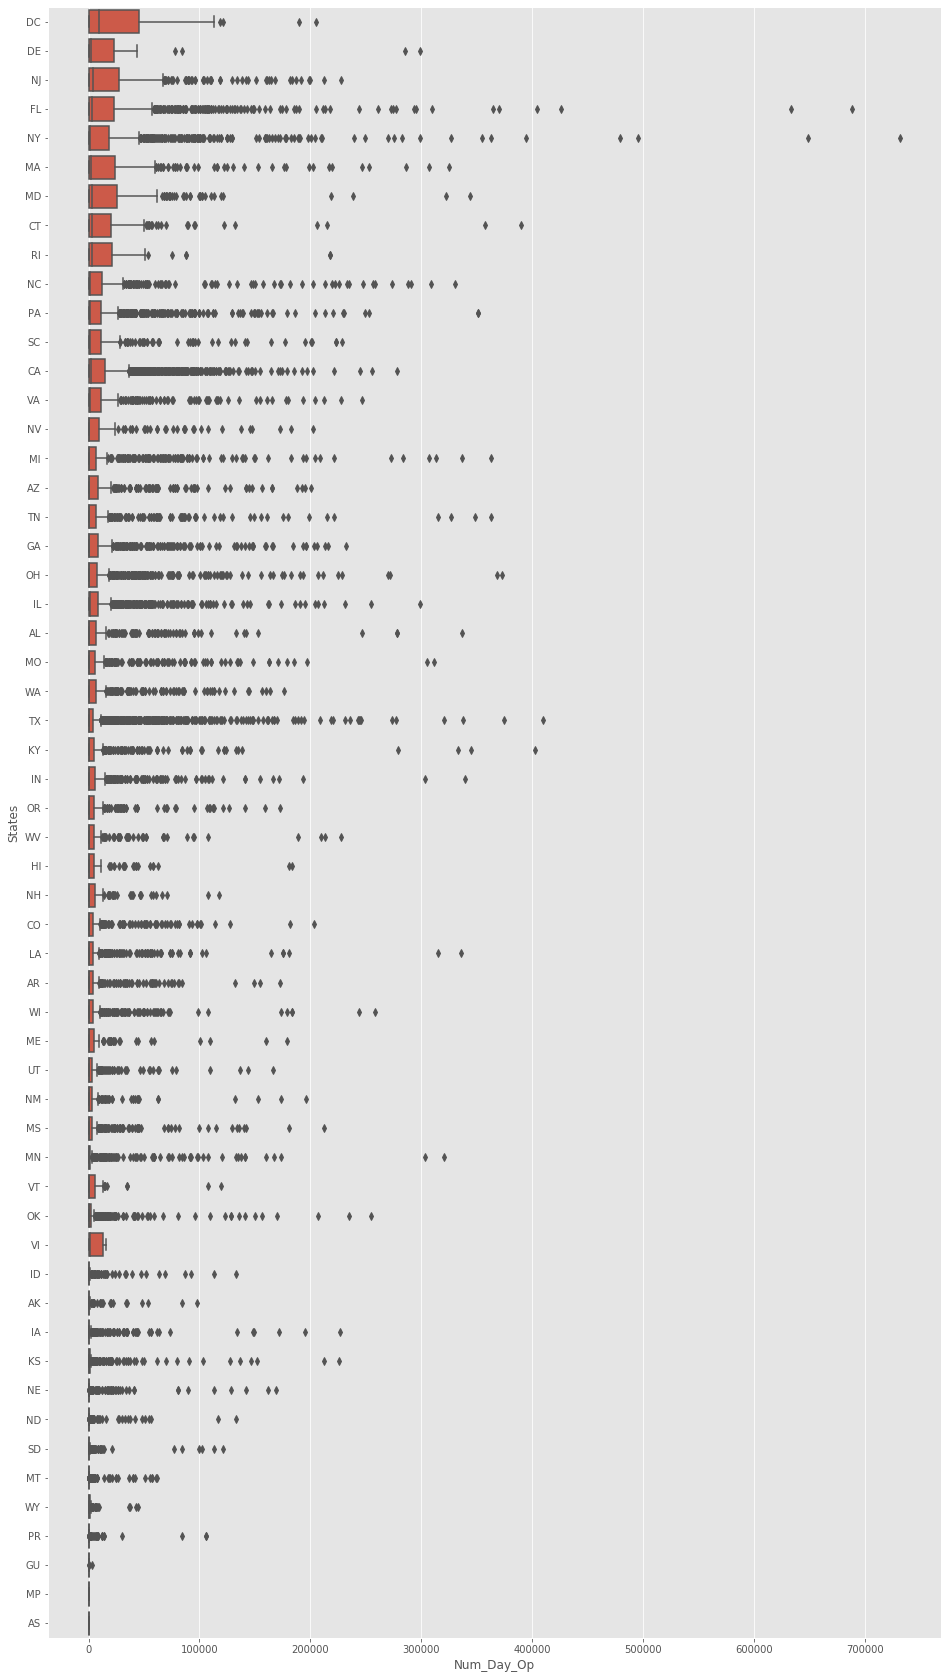

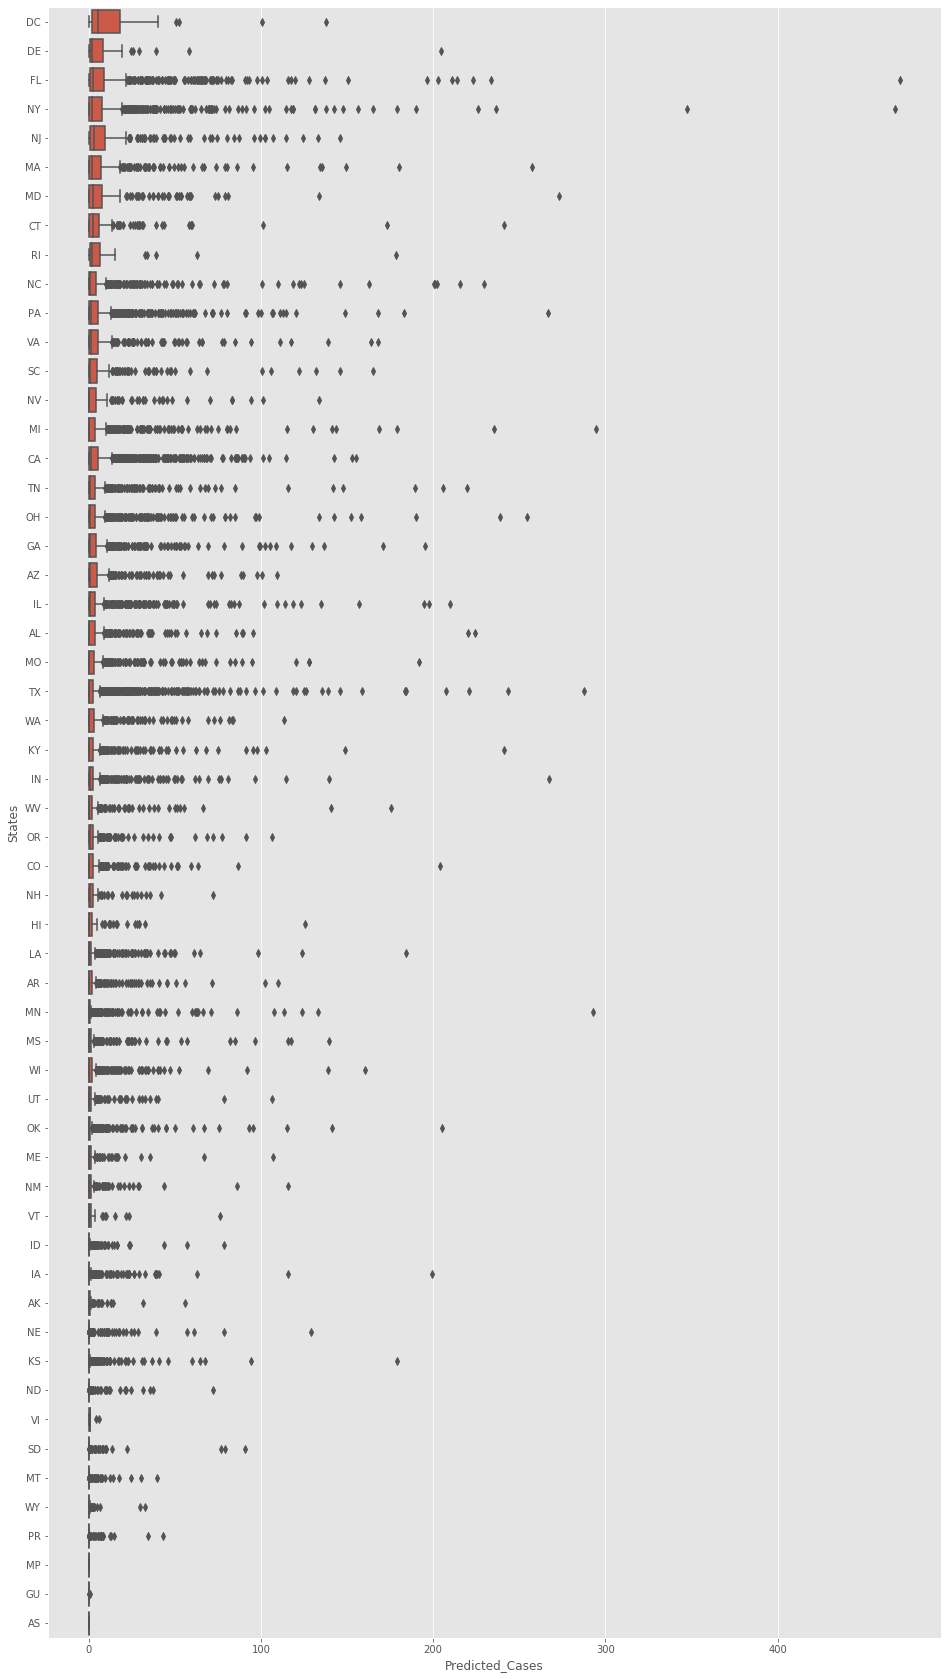

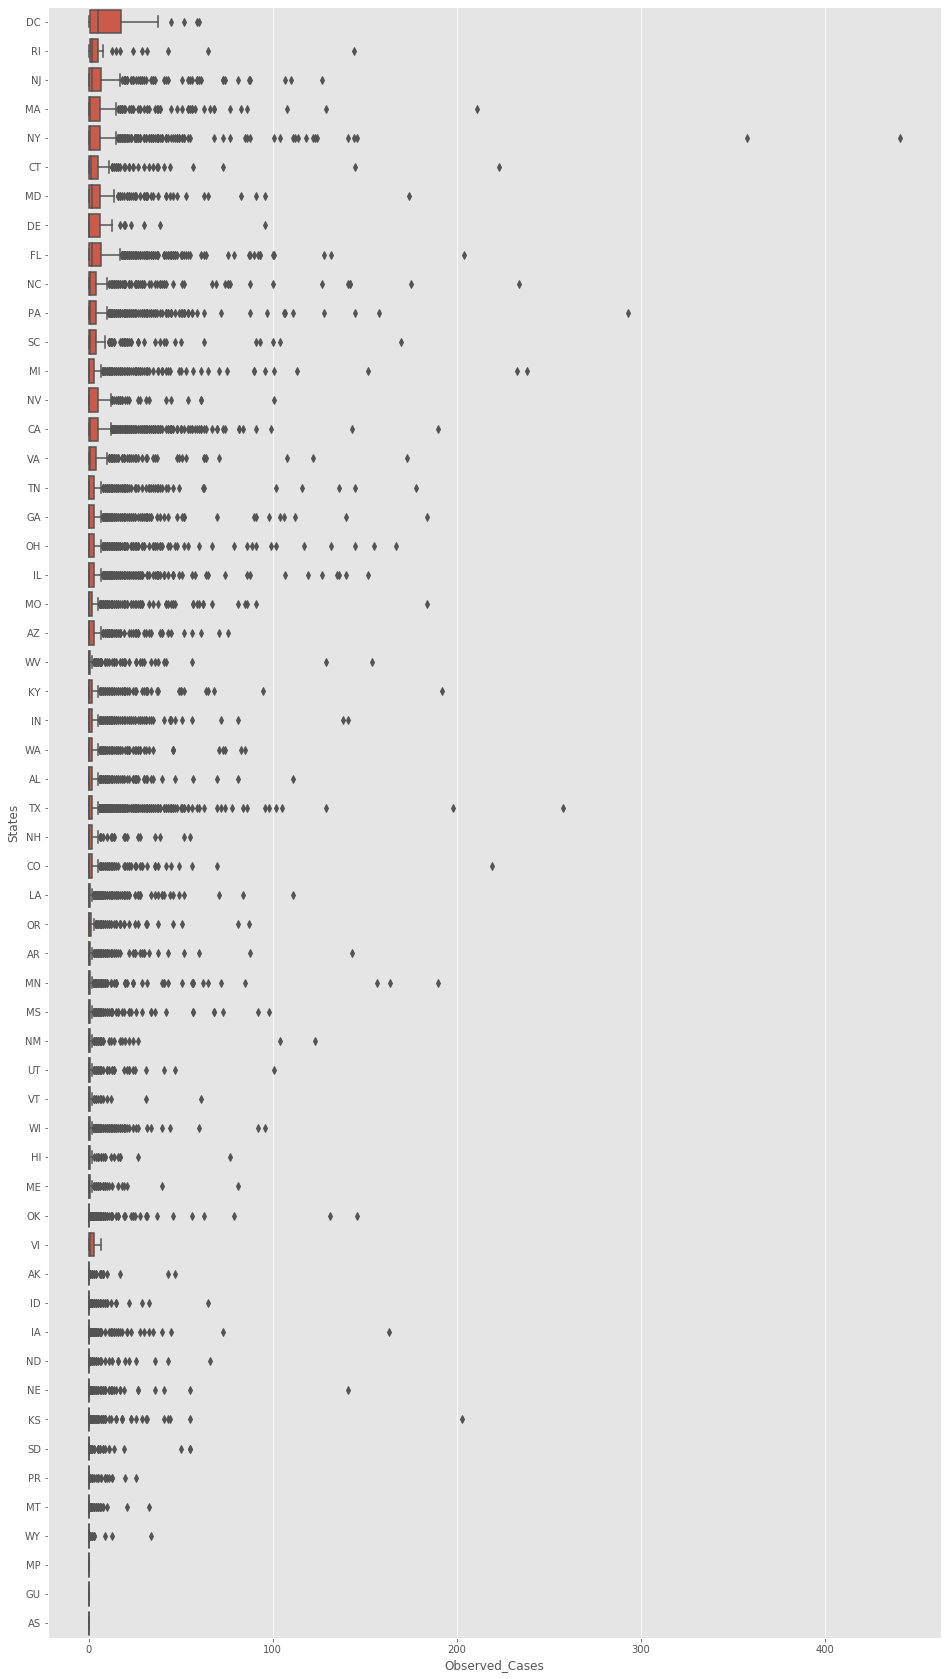

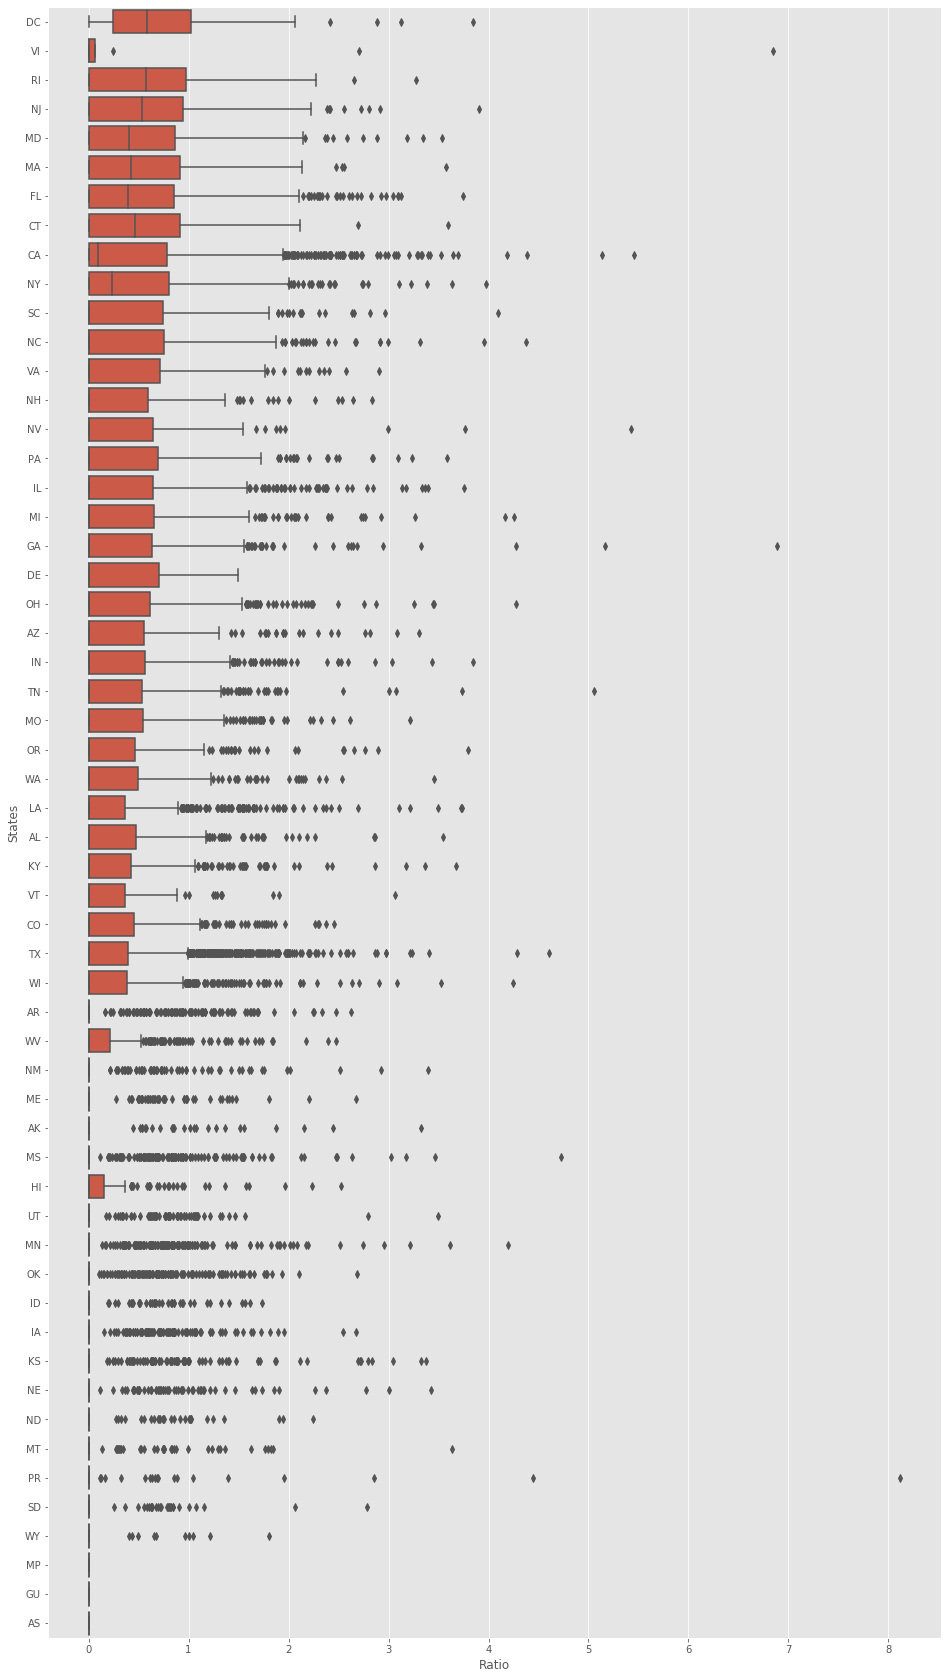

In [215]:
# plotting State against all numerical values

for var in numeric_vars:
    # taking the list of ordered states by var mean
    var_order = hospitals_mean.sort_values(by= var, ascending= False)[var].index
    plt.figure(figsize = [16,30])
    sns.boxplot(data = clean_df, y = 'State', x = var, order= var_order, color = default_color)
    plt.ylabel('States')

plt.show()

Although California and texas has the biggest number of hospitals and observed cases, they are not on the top of the tables when we take the mean of our numerical features, instead the district of columbia is.

Let's add variables to our plots and investigate more

<a id='Multivariate'></a>
#### Multivariate Exploration

Let's start with our predicted cases against the lower level of confidence and see how they are related to the observed cases

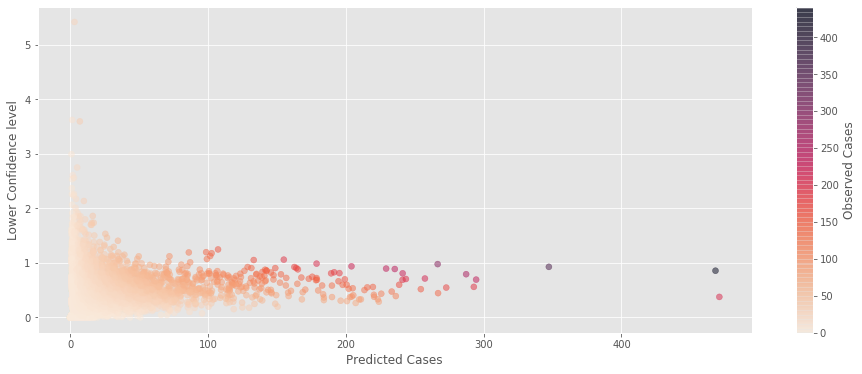

In [269]:
plt.figure(figsize=[16,6])
plt.scatter(data = clean_df, y= 'Low_confidence', x= 'Predicted_Cases', c = 'Observed_Cases',
           cmap = 'rocket_r', alpha = 0.5);
plt.ylabel('Lower Confidence level')
plt.xlabel('Predicted Cases')
plt.colorbar(label = 'Observed Cases');

Under 50 predicted cases, if the lower confidence level is hight we observe some cases, 
for more than 50 predicted cases especially after 100 the confidence level is almost stable between 0.25 up to around 1, when the confidence is aroun 1 we observe hight cases.

Let's see the relationship between Number of patient days or operations, predicted and observed cases

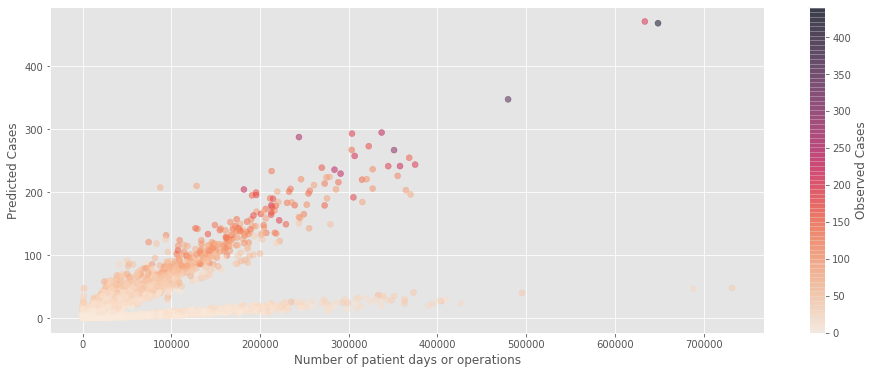

In [264]:
plt.figure(figsize=[16,6])
plt.scatter(data = clean_df, x= 'Num_Day_Op', y= 'Predicted_Cases', c = 'Observed_Cases',
           cmap = 'rocket_r', alpha = 0.5);
plt.xlabel('Number of patient days or operations')
plt.ylabel('Predicted Cases')
plt.colorbar(label = 'Observed Cases');

seems that we have two linear trends:
- the first starting from about 50.000 operations und up with no more than 50 predicted cases
- the second from 0 un up, the higher the number the higher the predicted and observed cases


Let's do now the Number of patient days or operations per measure ID and see how they relate to the observed cases

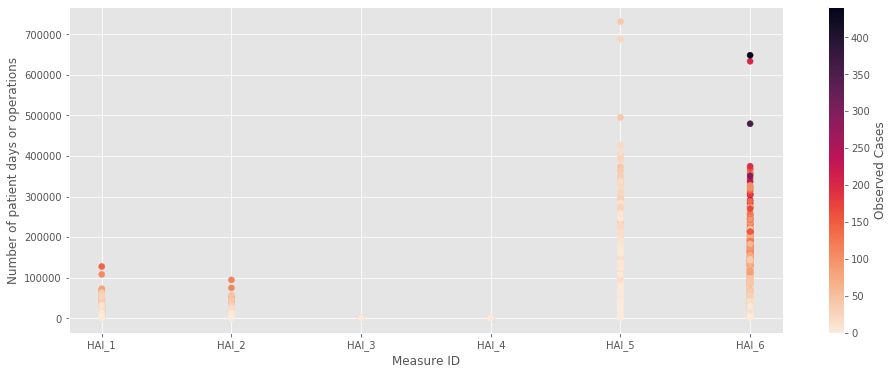

In [270]:
plt.figure(figsize=[16,6])
plt.scatter(data = clean_df, x = 'Measure_ID', y = 'Num_Day_Op', c = 'Observed_Cases',
           cmap = 'rocket_r')
plt.xlabel('Measure ID')
plt.ylabel('Number of patient days or operations')
plt.colorbar(label = 'Observed Cases');

Except HAI_3 and HAI_4 where the Number of patient days or operations is 0, the bigger the number the higher the observed cases, with HAI_6 that seems to have much higher observed cases anywhere between about 50.000 and up.

Let's see the variations of our numerical values per Measure ID and compared to National Benchmark



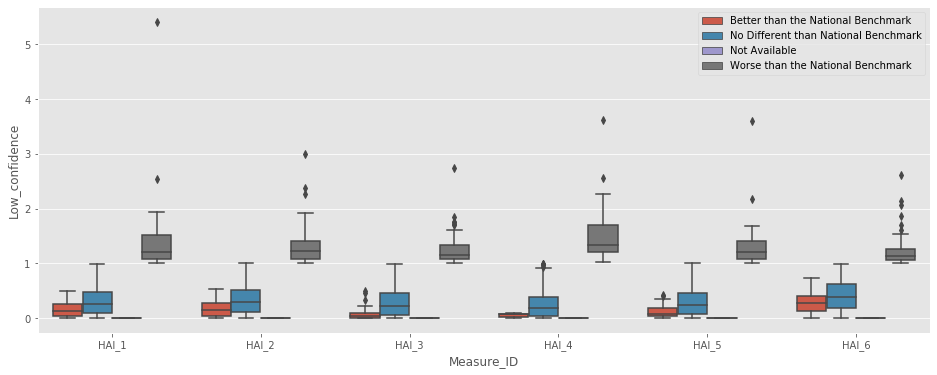

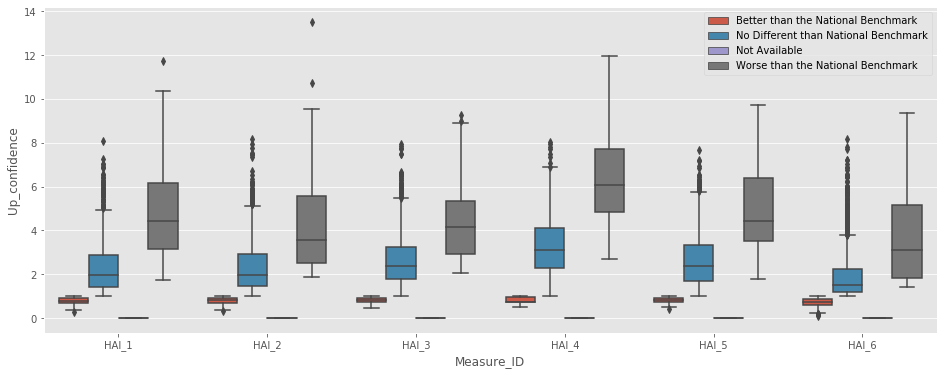

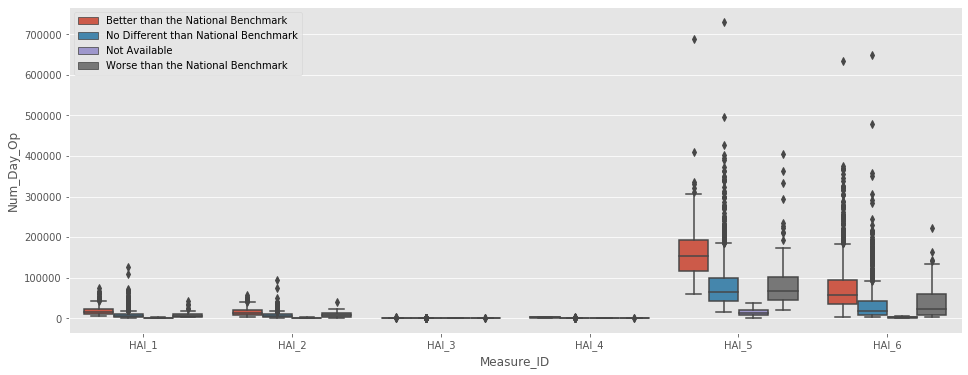

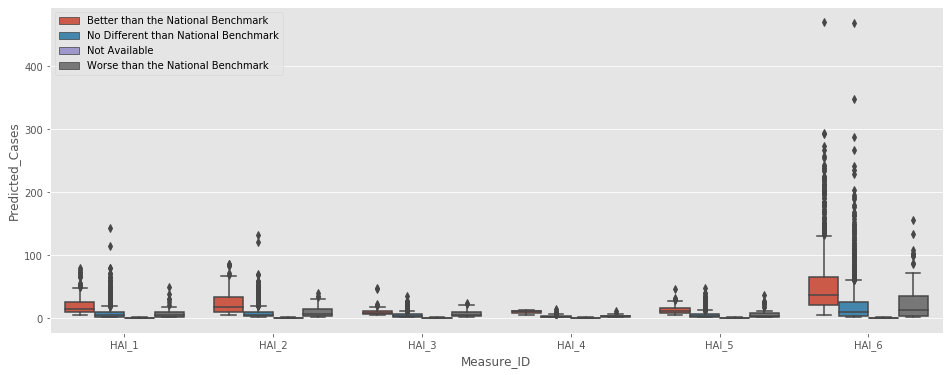

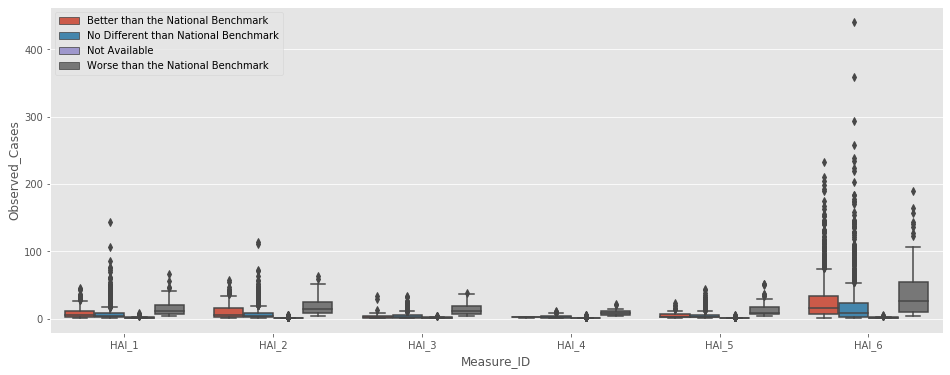

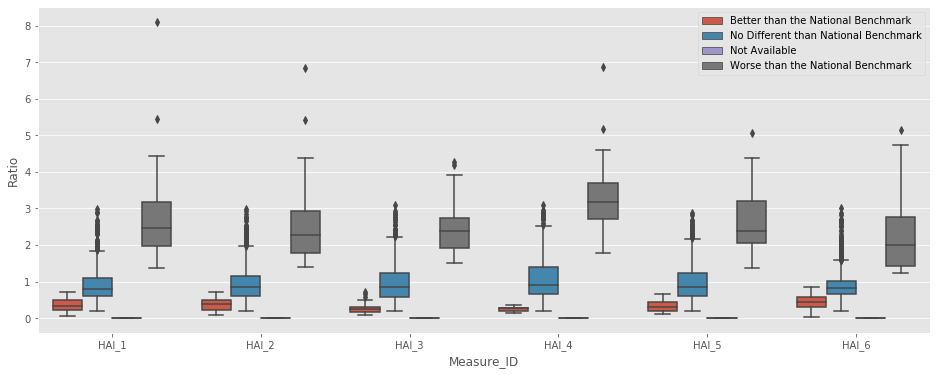

In [236]:
for var in numeric_vars:
    plt.figure(figsize = [16,6])
    sns.boxplot(data = positive_observations, x= 'Measure_ID', y= var, hue = 'Compared_to_National')
    plt.legend(loc= 'best')

plt.show()

Compared to the normal hospitals, the lower confidence level of the best benchmarked ones have less median and interquartile values, their maximum values are less than the normal max which is around 1. Contrarily the minimum of the Worst benchmarked hospitals is 1, their medians and IQR are higher and a much higher outliers. For the upper confidence level, The max of the best hospitals around the min of the normal ones and have a much smaller IQR, the min of the worst hospitals is around the median of the normal ones and have a higher IQR.

The Medians and interquartiles of the best benchmarked hospitals for the Number of patient days or operations and predicted cases are higher than the normal and the worst hospitals, however the observed cases are less than the predicted ones,therefore a lower ratio with a lower IQR values and a maximum not exceeding the normal median opposed to the worst hospitals who have a minimum ratio bigger than the normal Q3 upper quartile.


Let's see the distribution of our numerical value per state and per measure ID

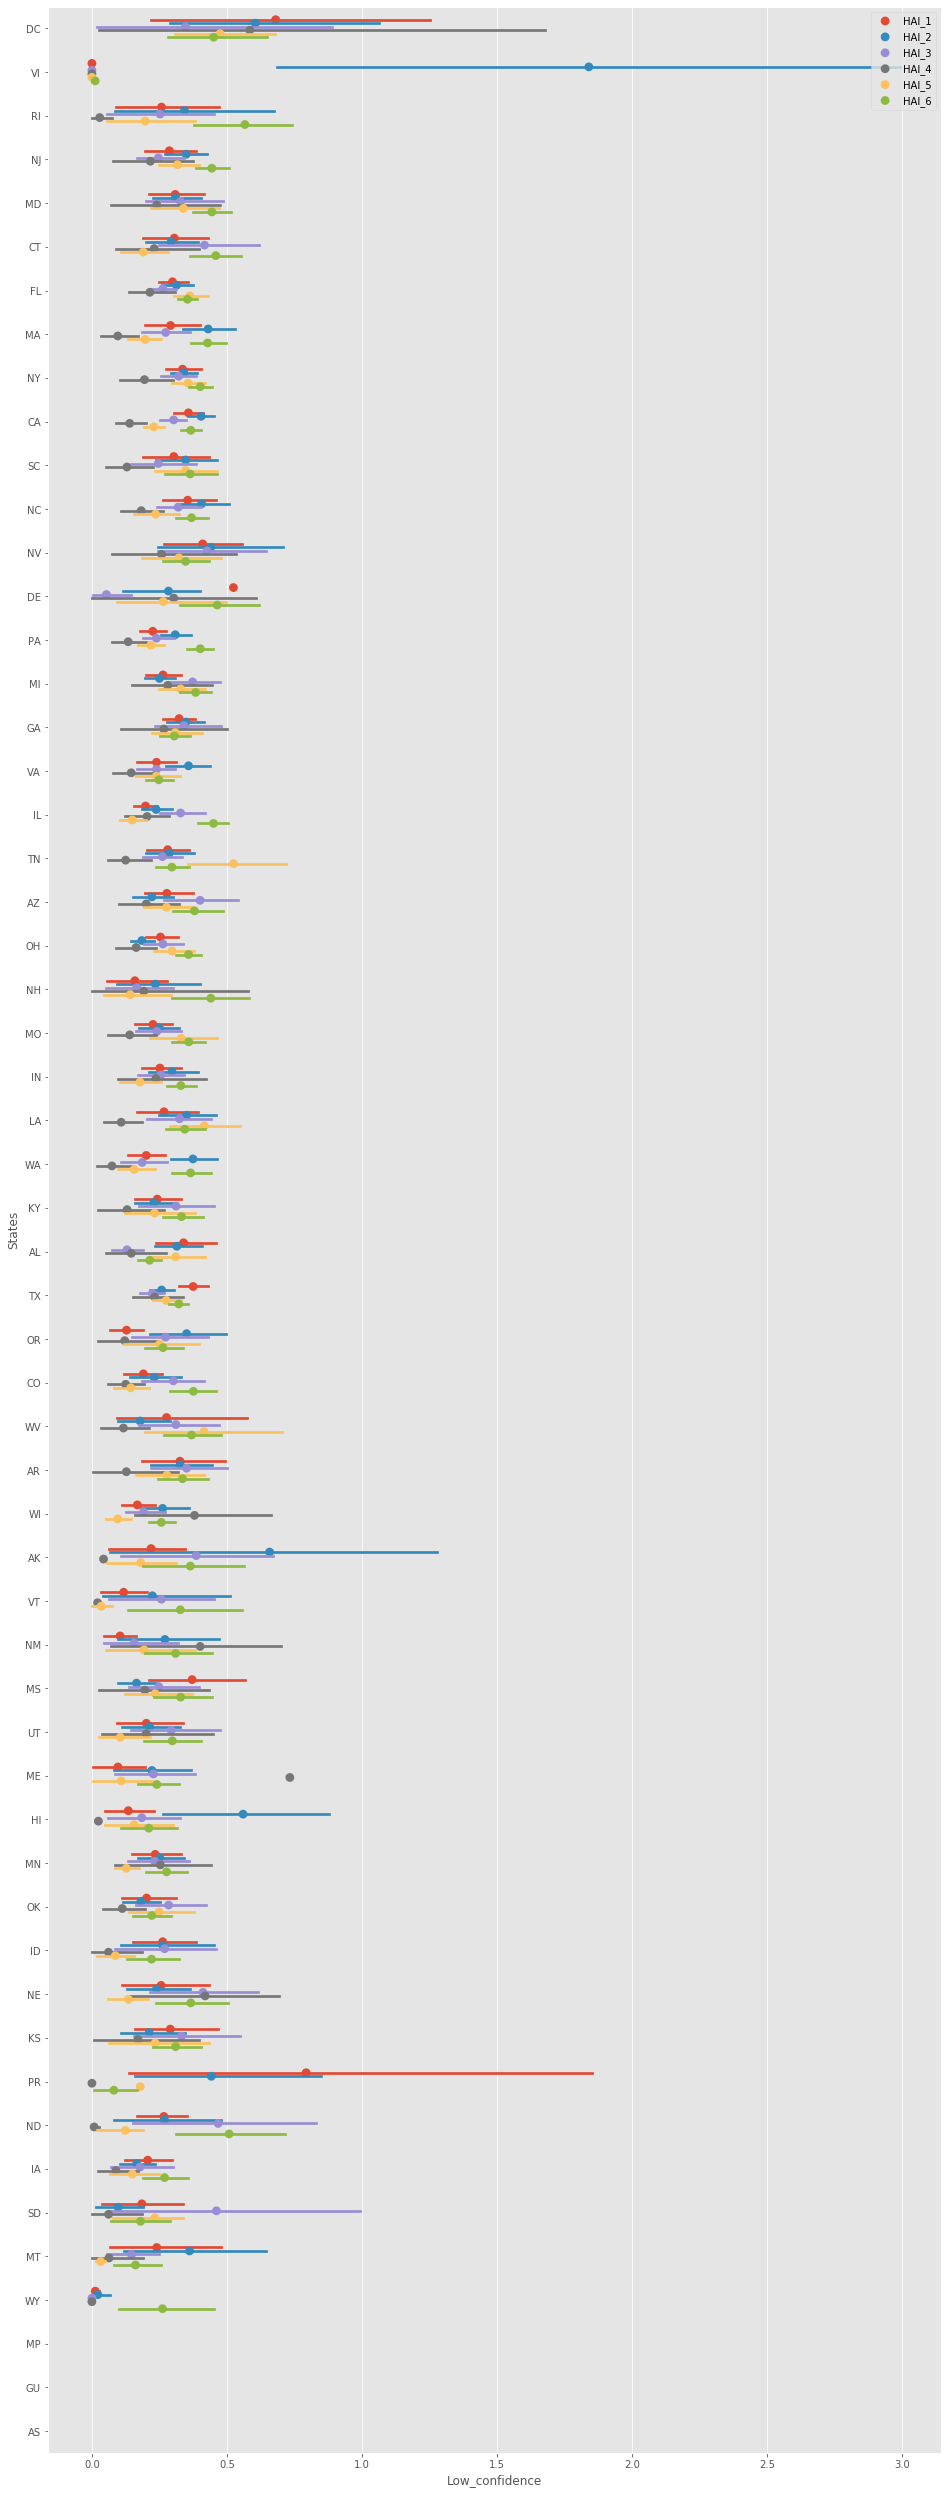

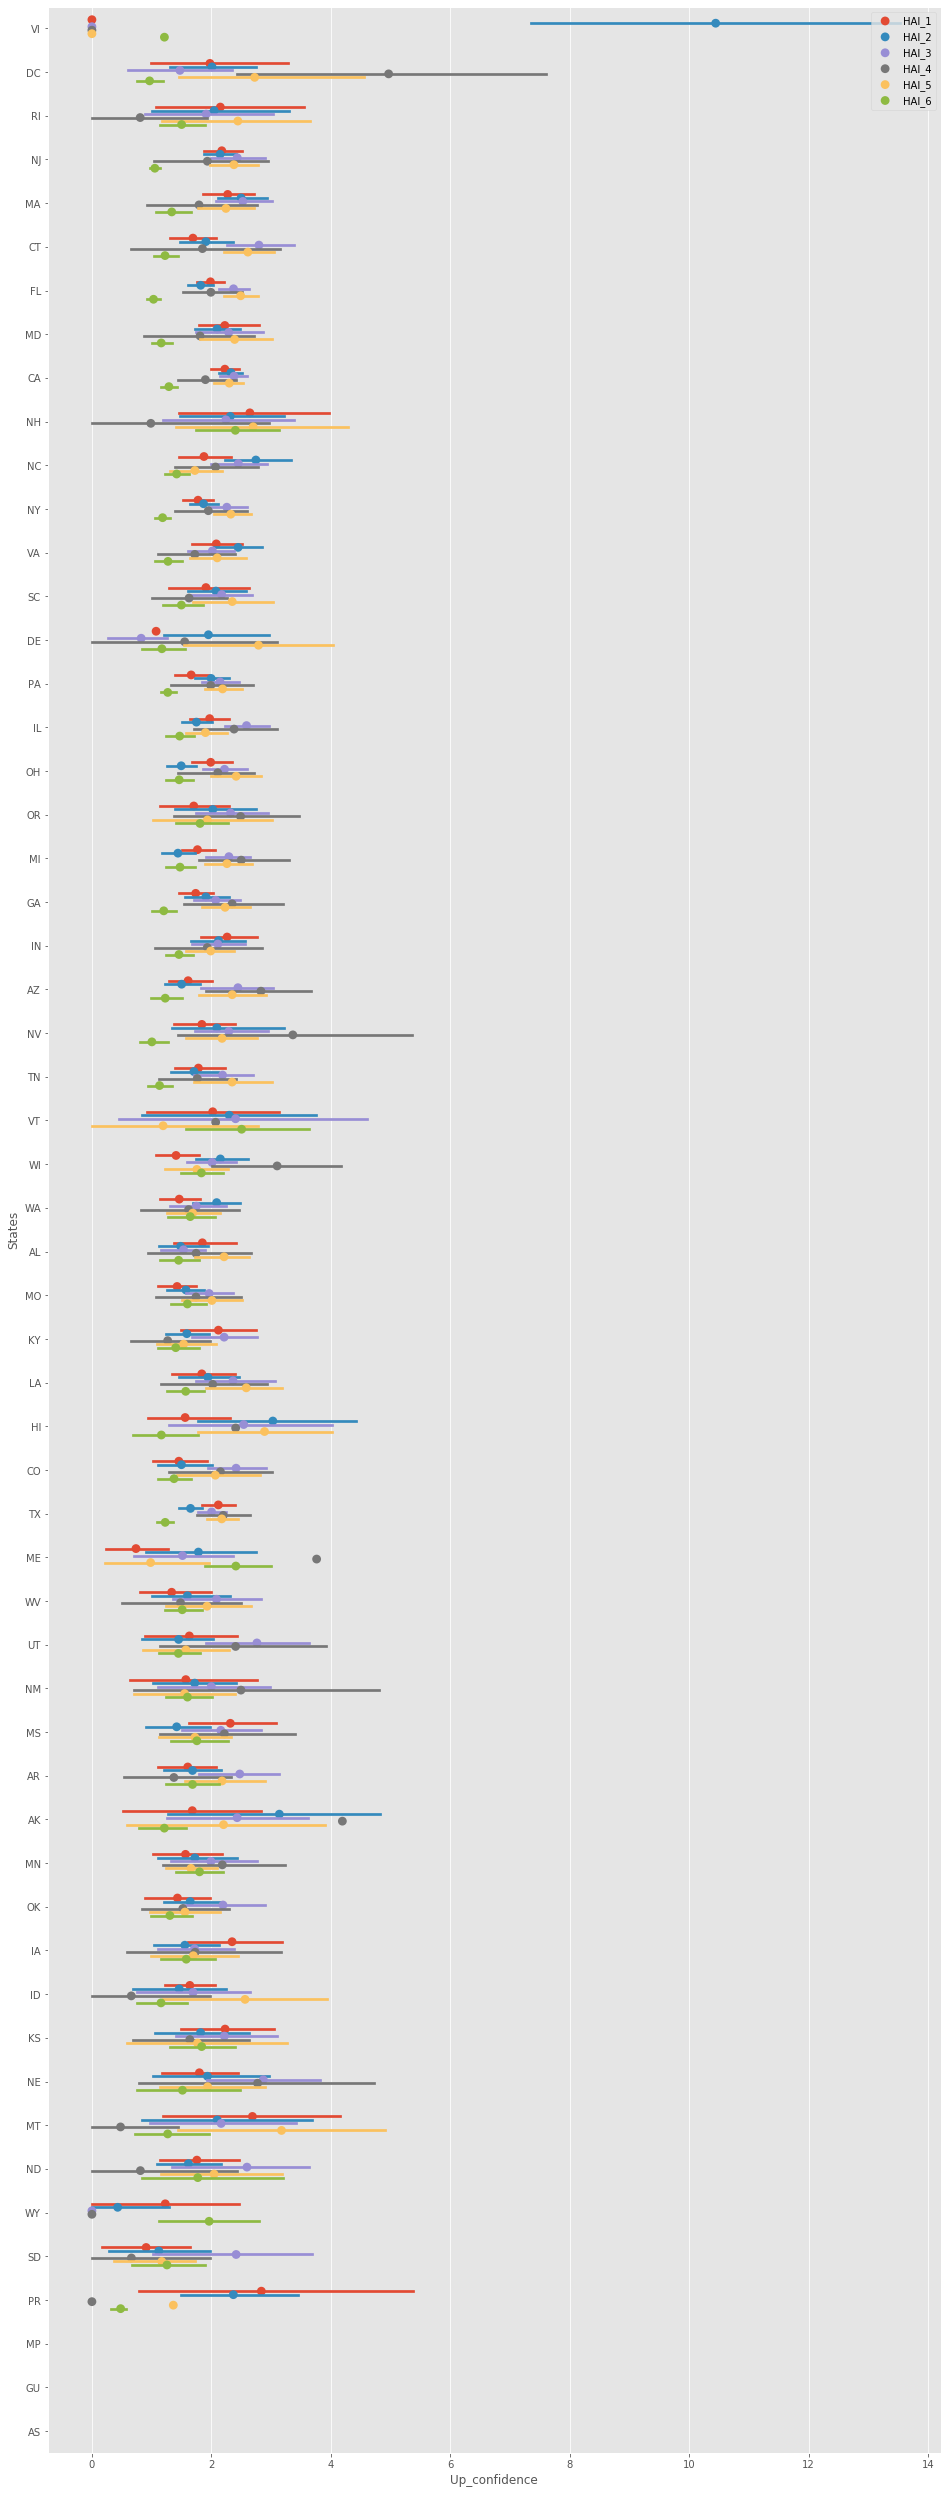

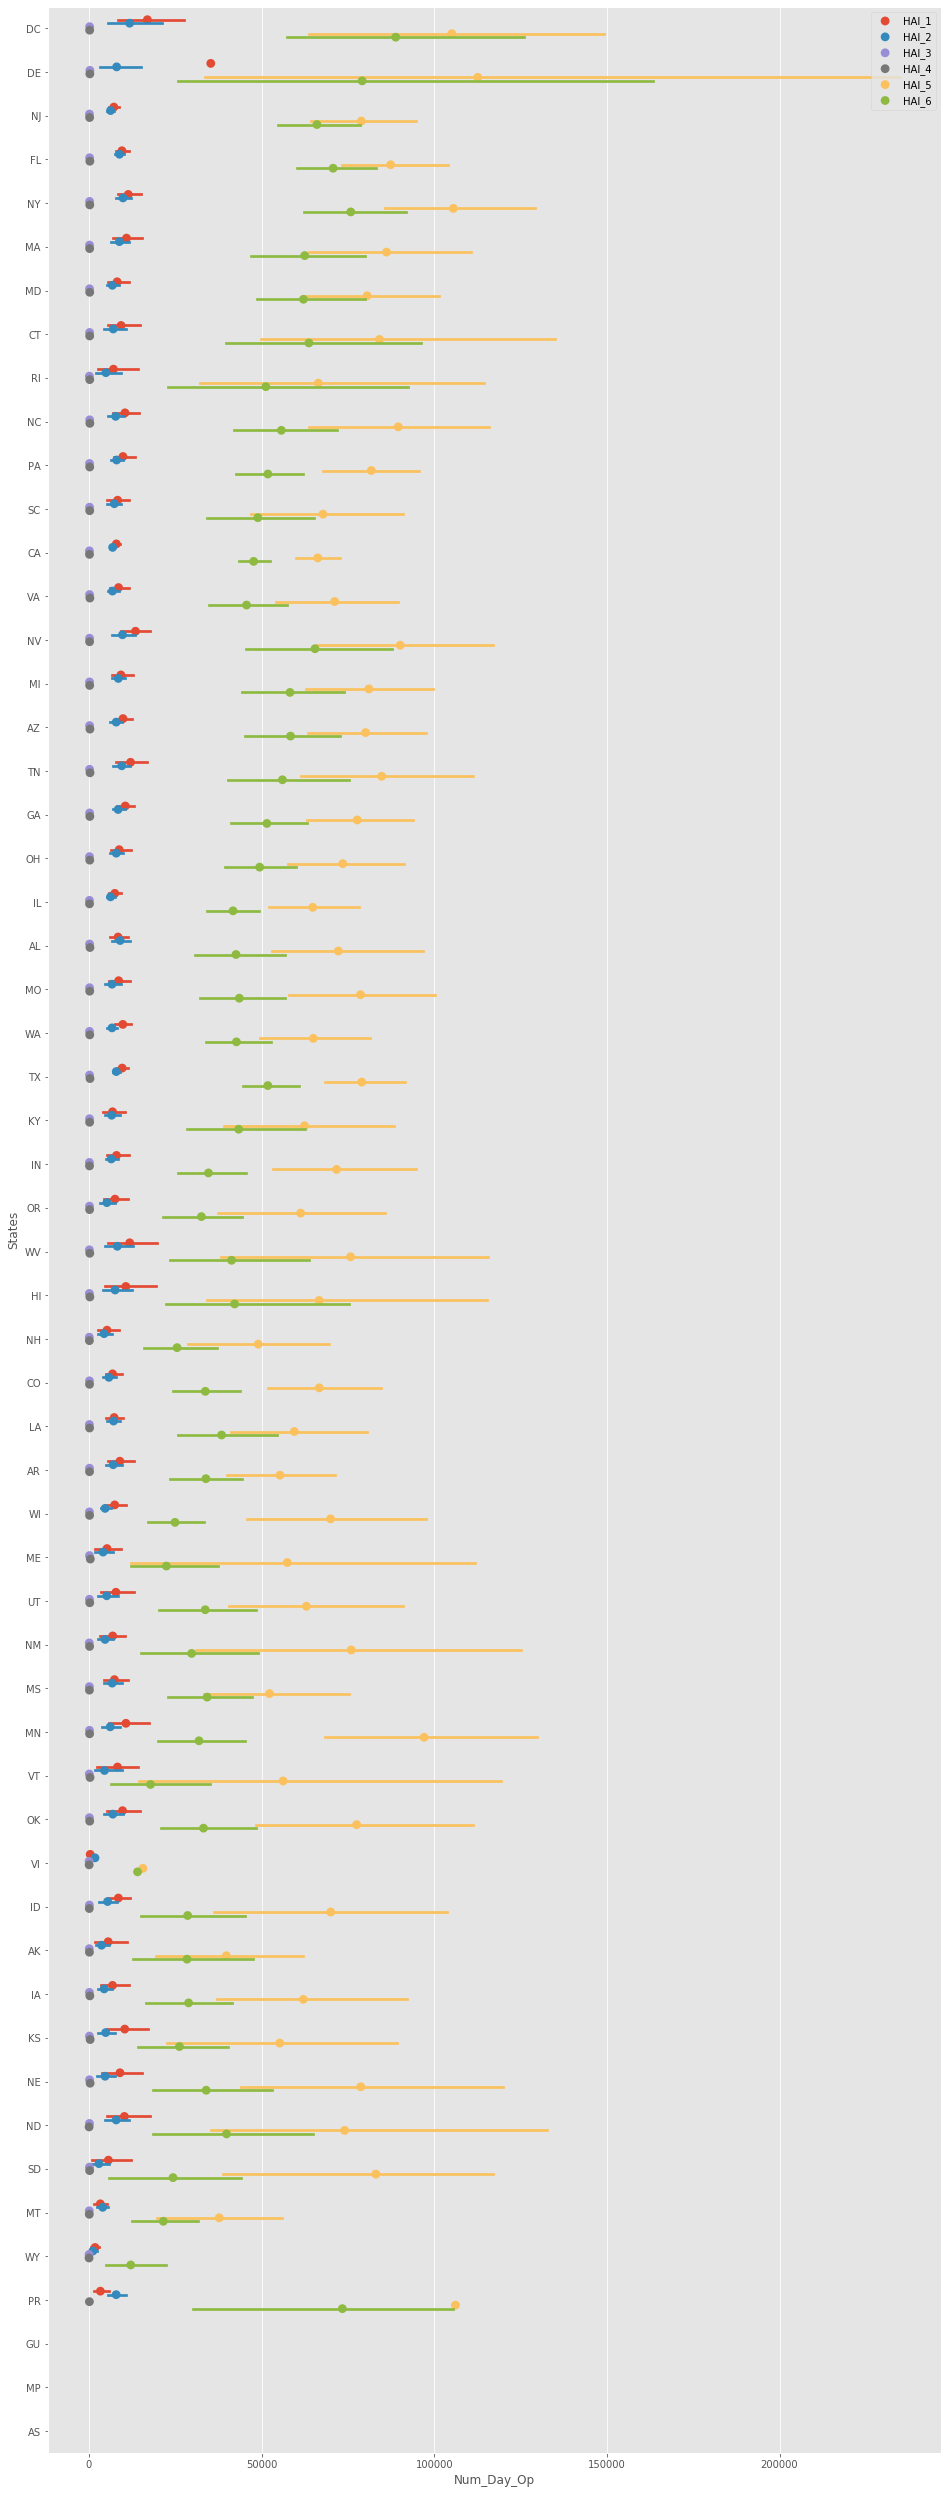

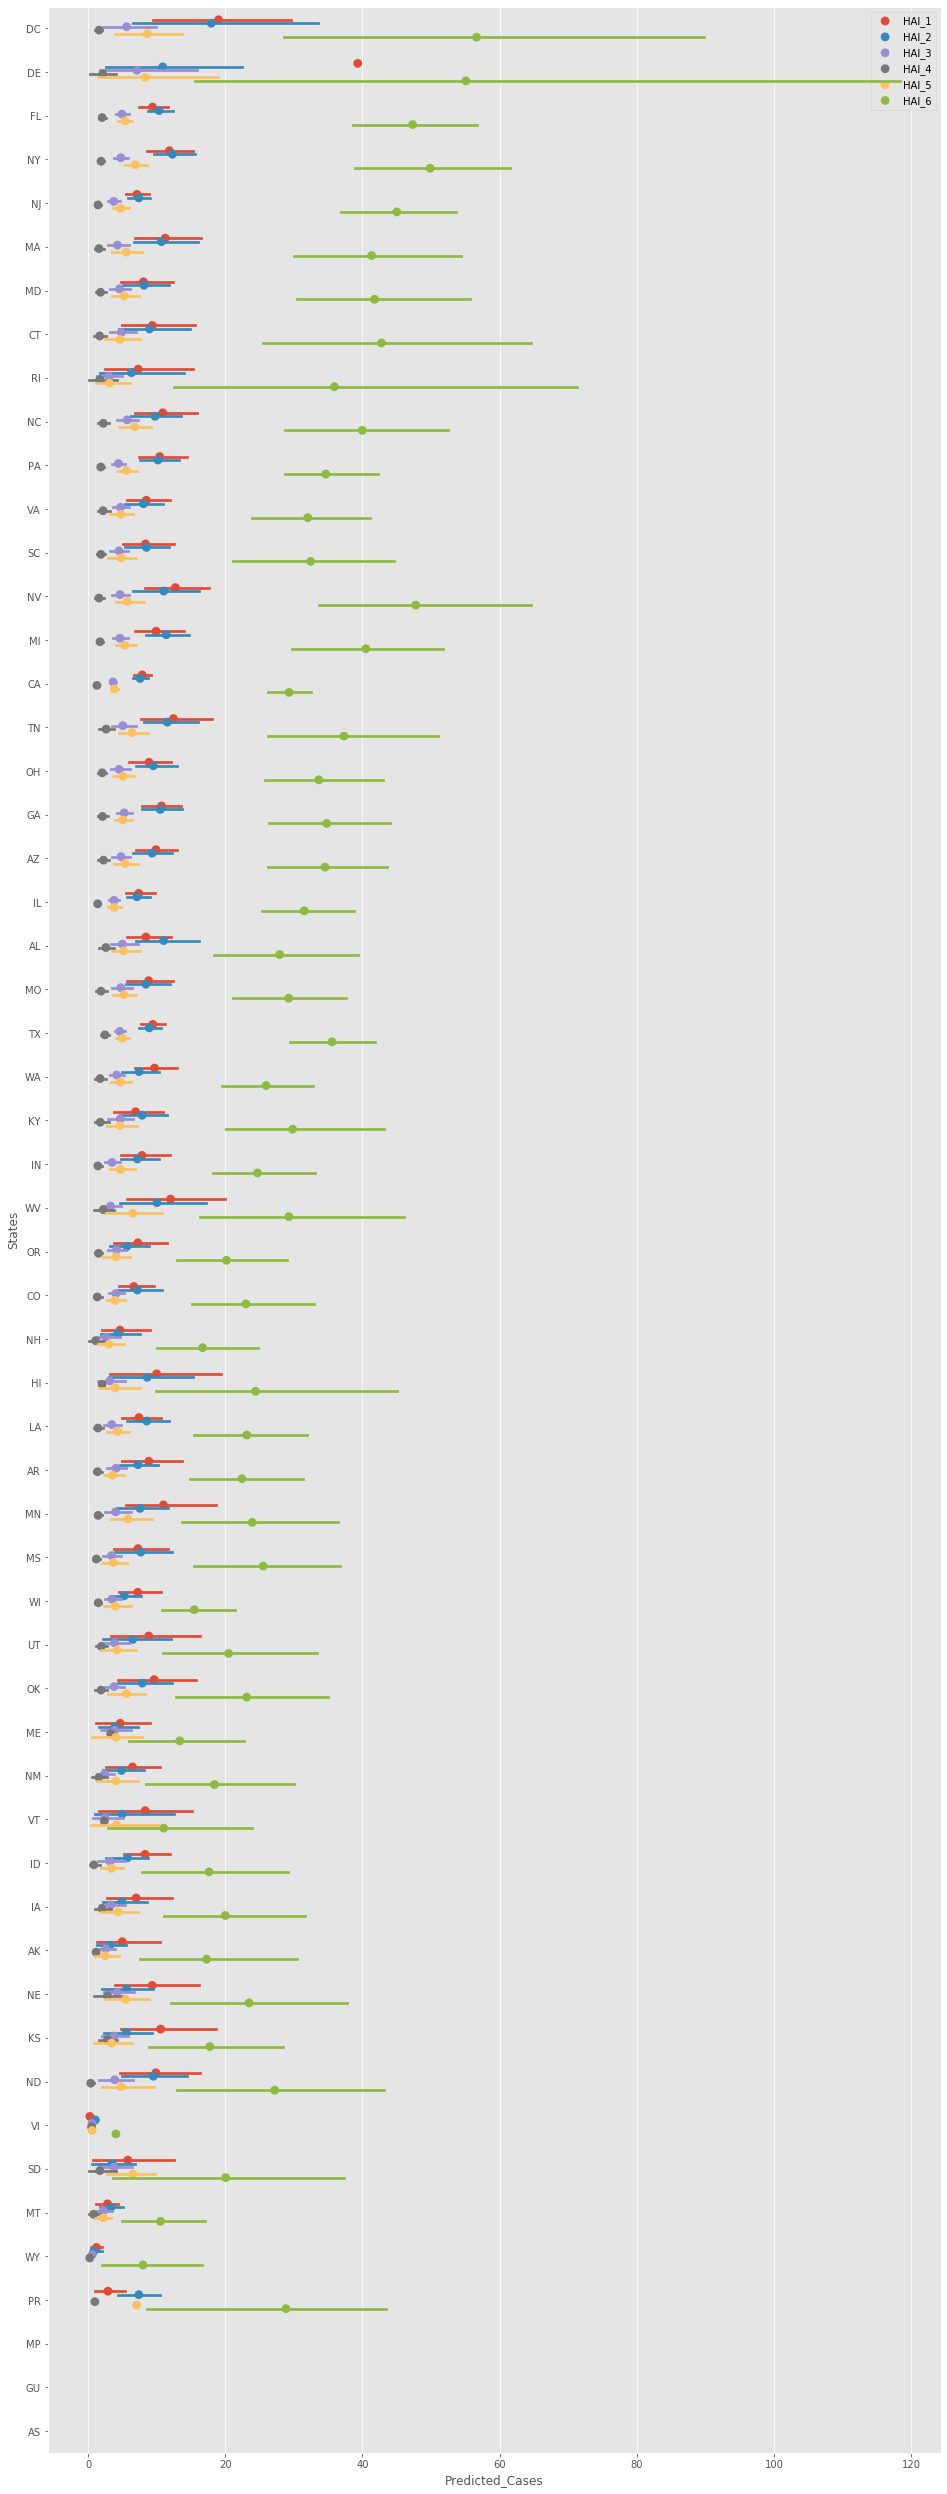

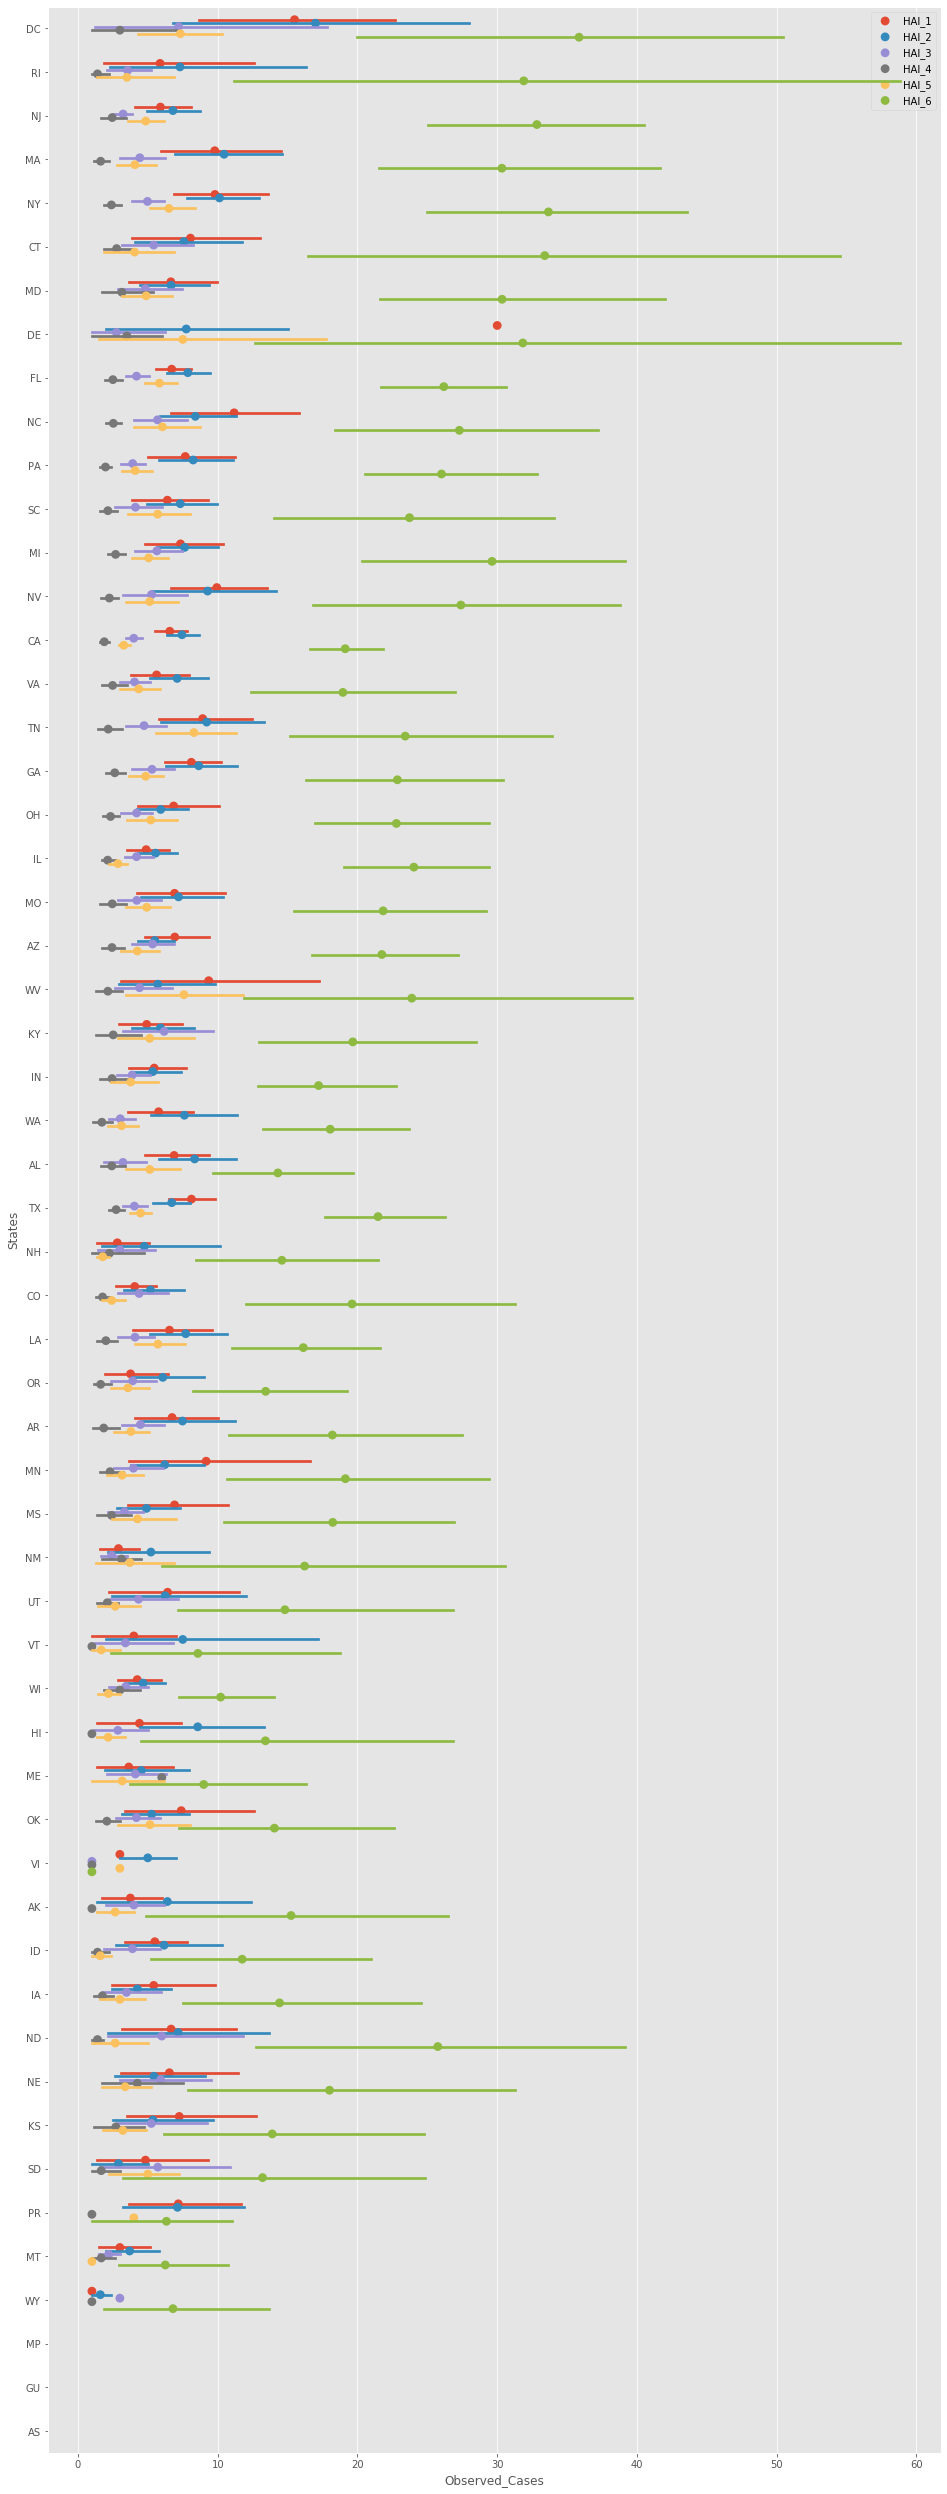

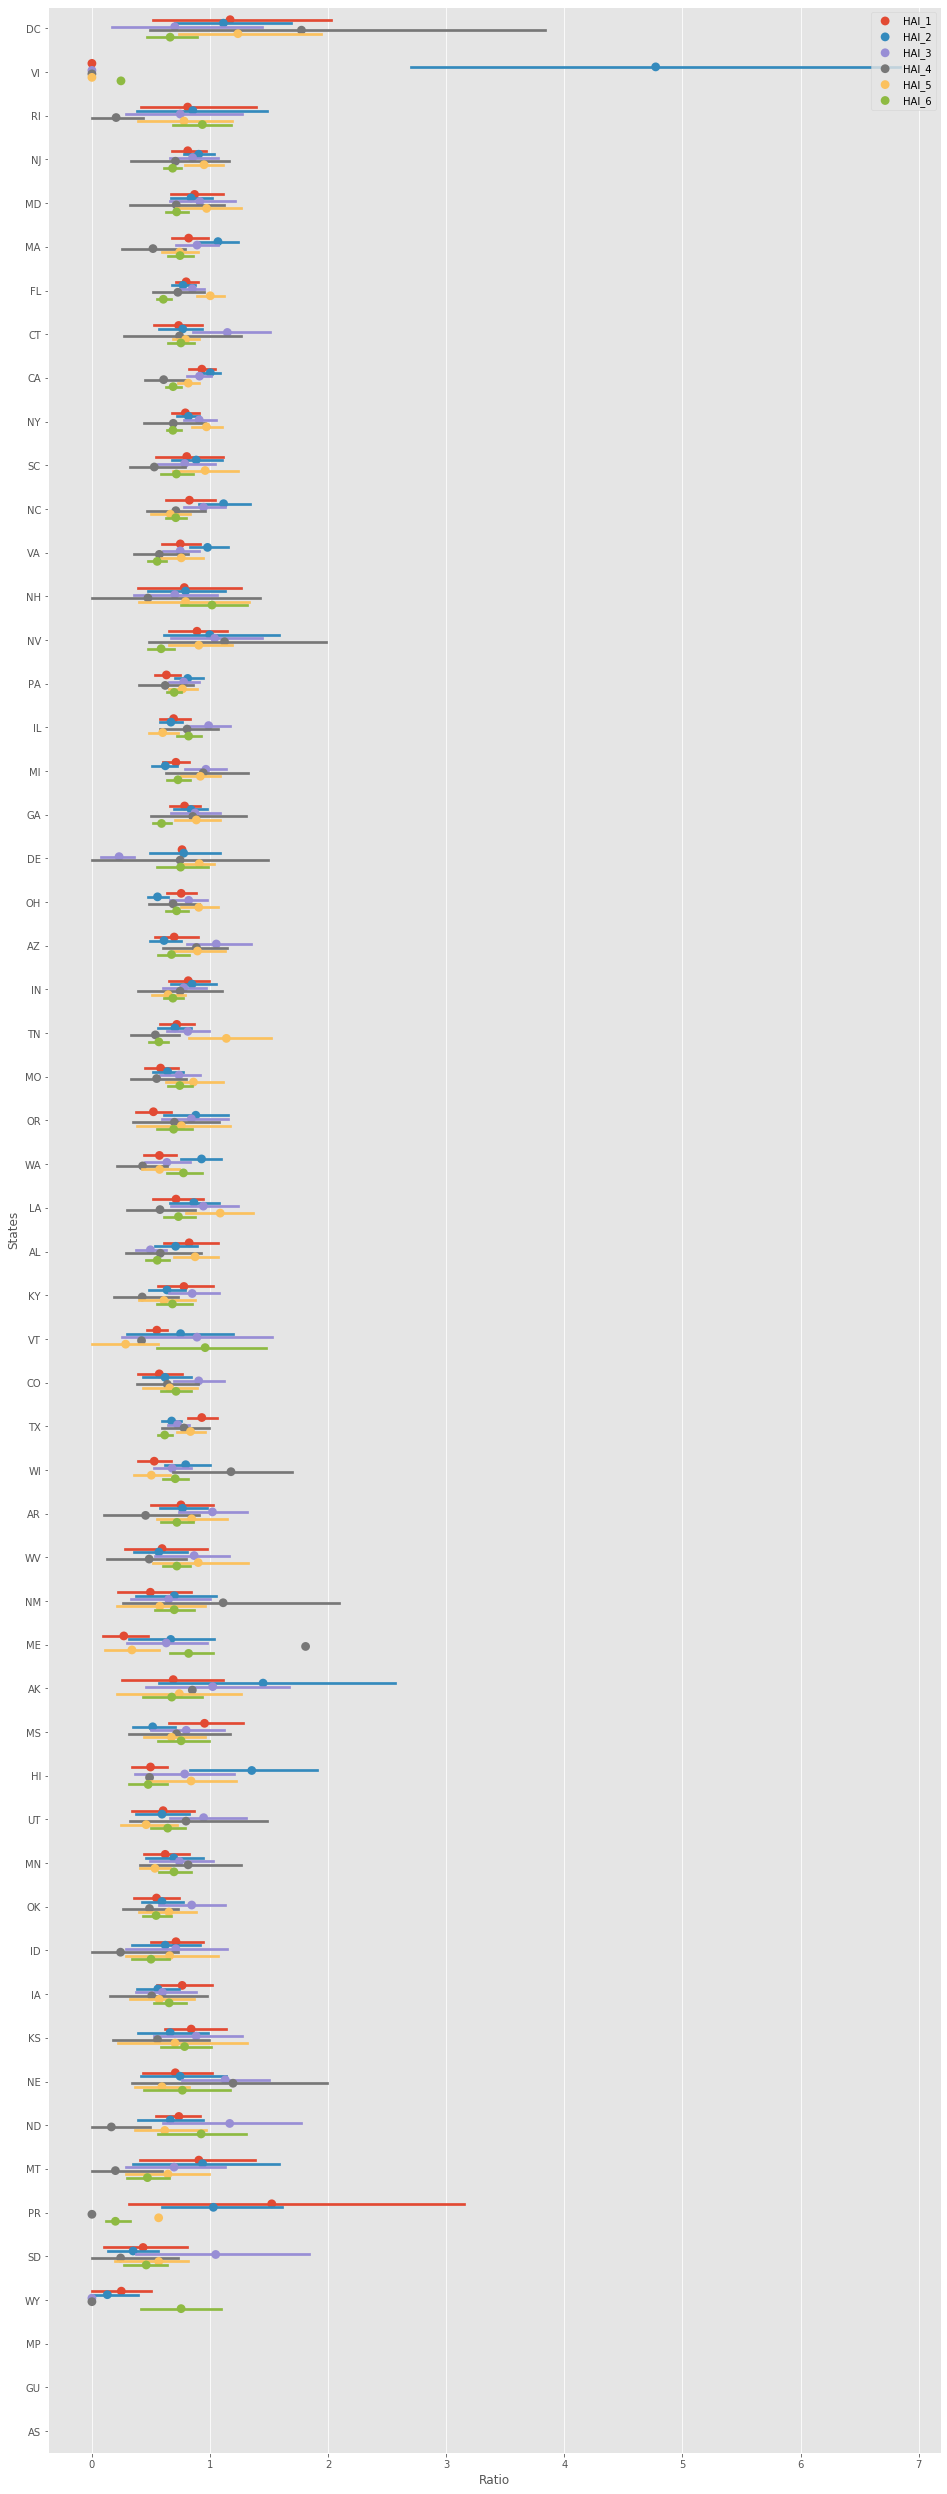

In [271]:
for var in numeric_vars:
    # taking the list of ordered states by var mean
    var_order = hospitals_mean.sort_values(by= var, ascending= False)[var].index
    plt.figure(figsize = [16,45])
    ax = sns.pointplot(data = positive_observations, x = var, y = 'State', hue = 'Measure_ID',
                       order= var_order, linestyles = '', dodge = 0.4)
    plt.legend(loc= 'upper right')
    plt.ylabel('States')

plt.show()

HAI_5 and HAI_6 have the highest numbers of patient days or operations, but HAI_6 is the one who has the highest predicted and observed cases in all states, with DC, VI, RI and NJ leading the board of the highest Ratio means.

Let's see the distribution of our numerical value per state and per Benchmark

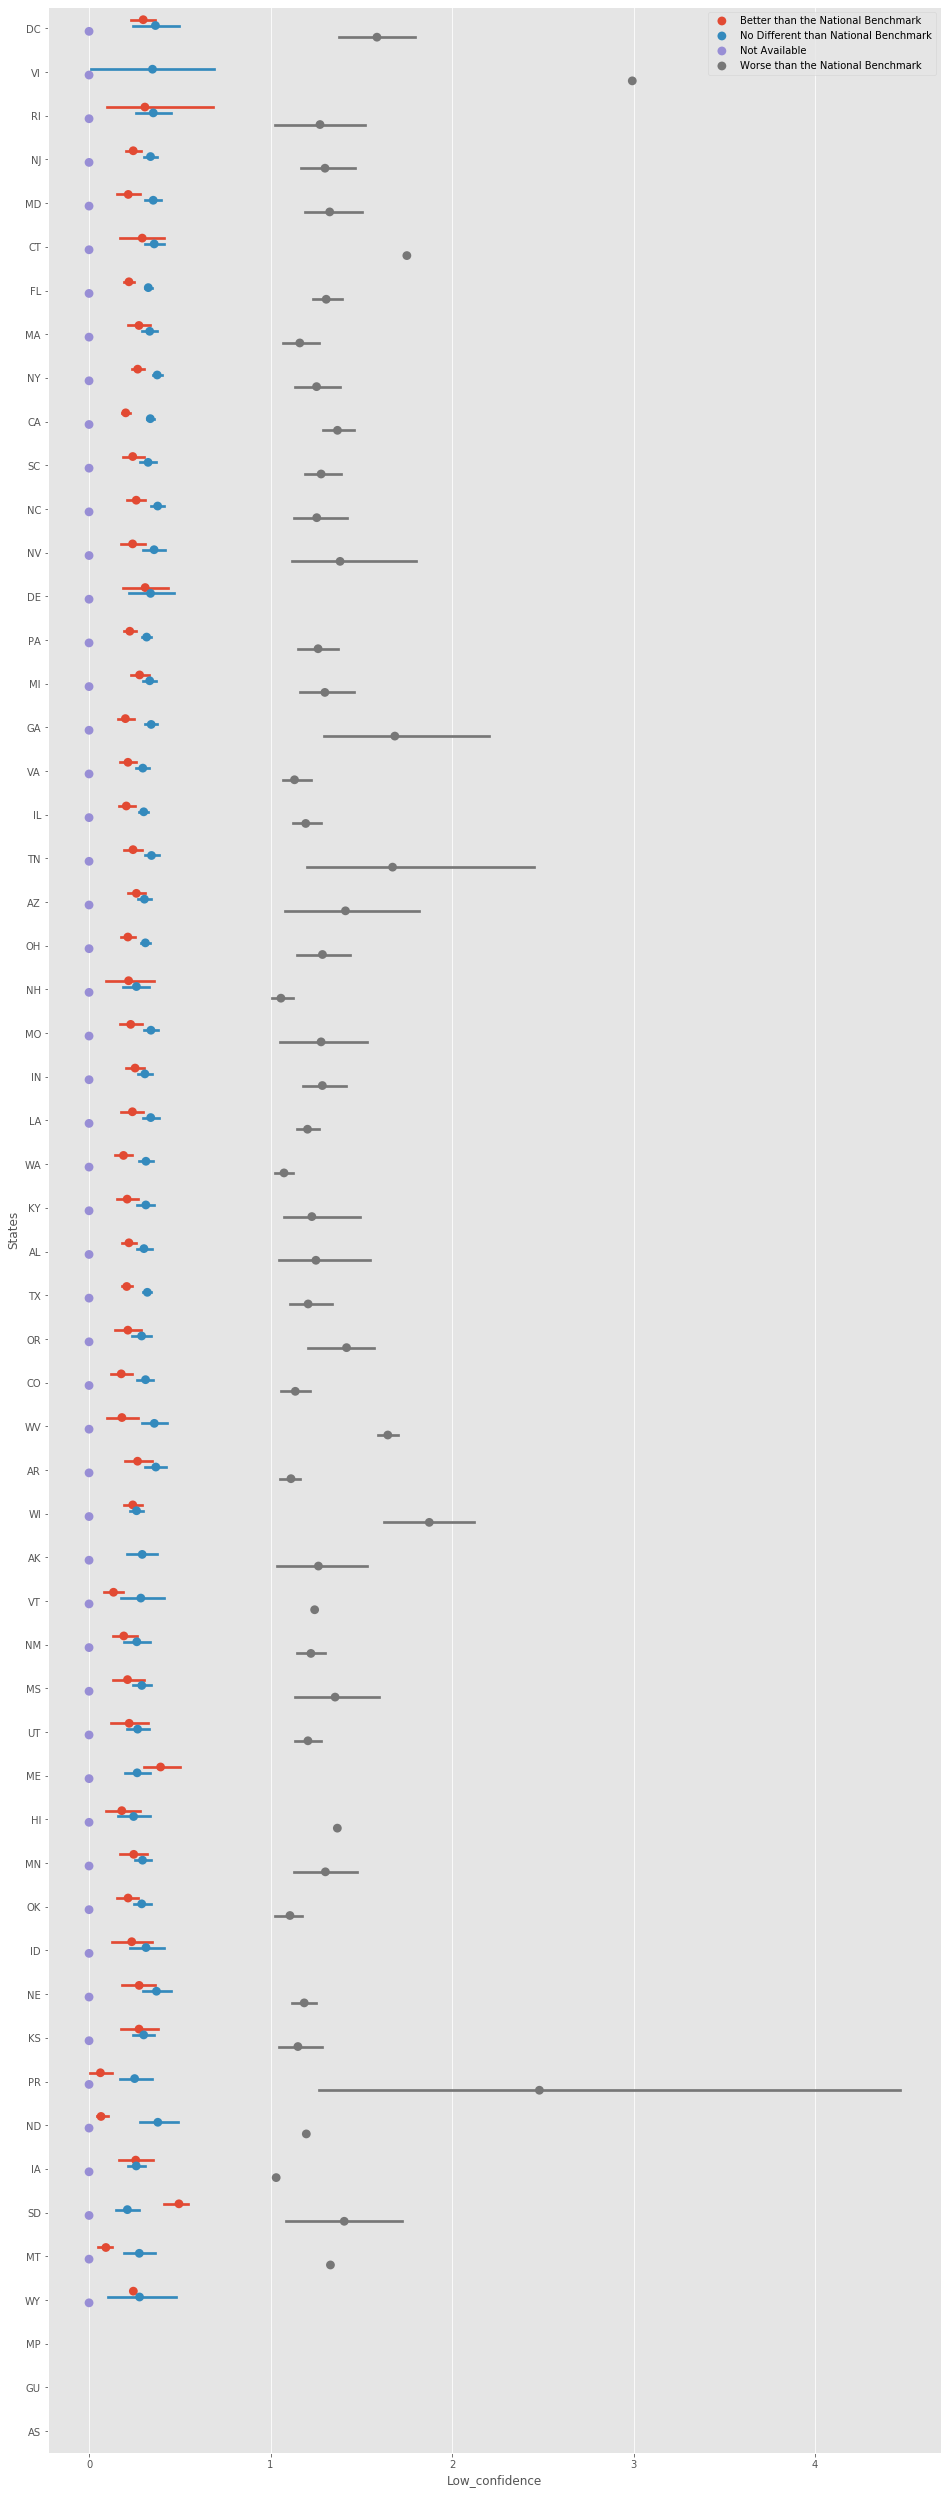

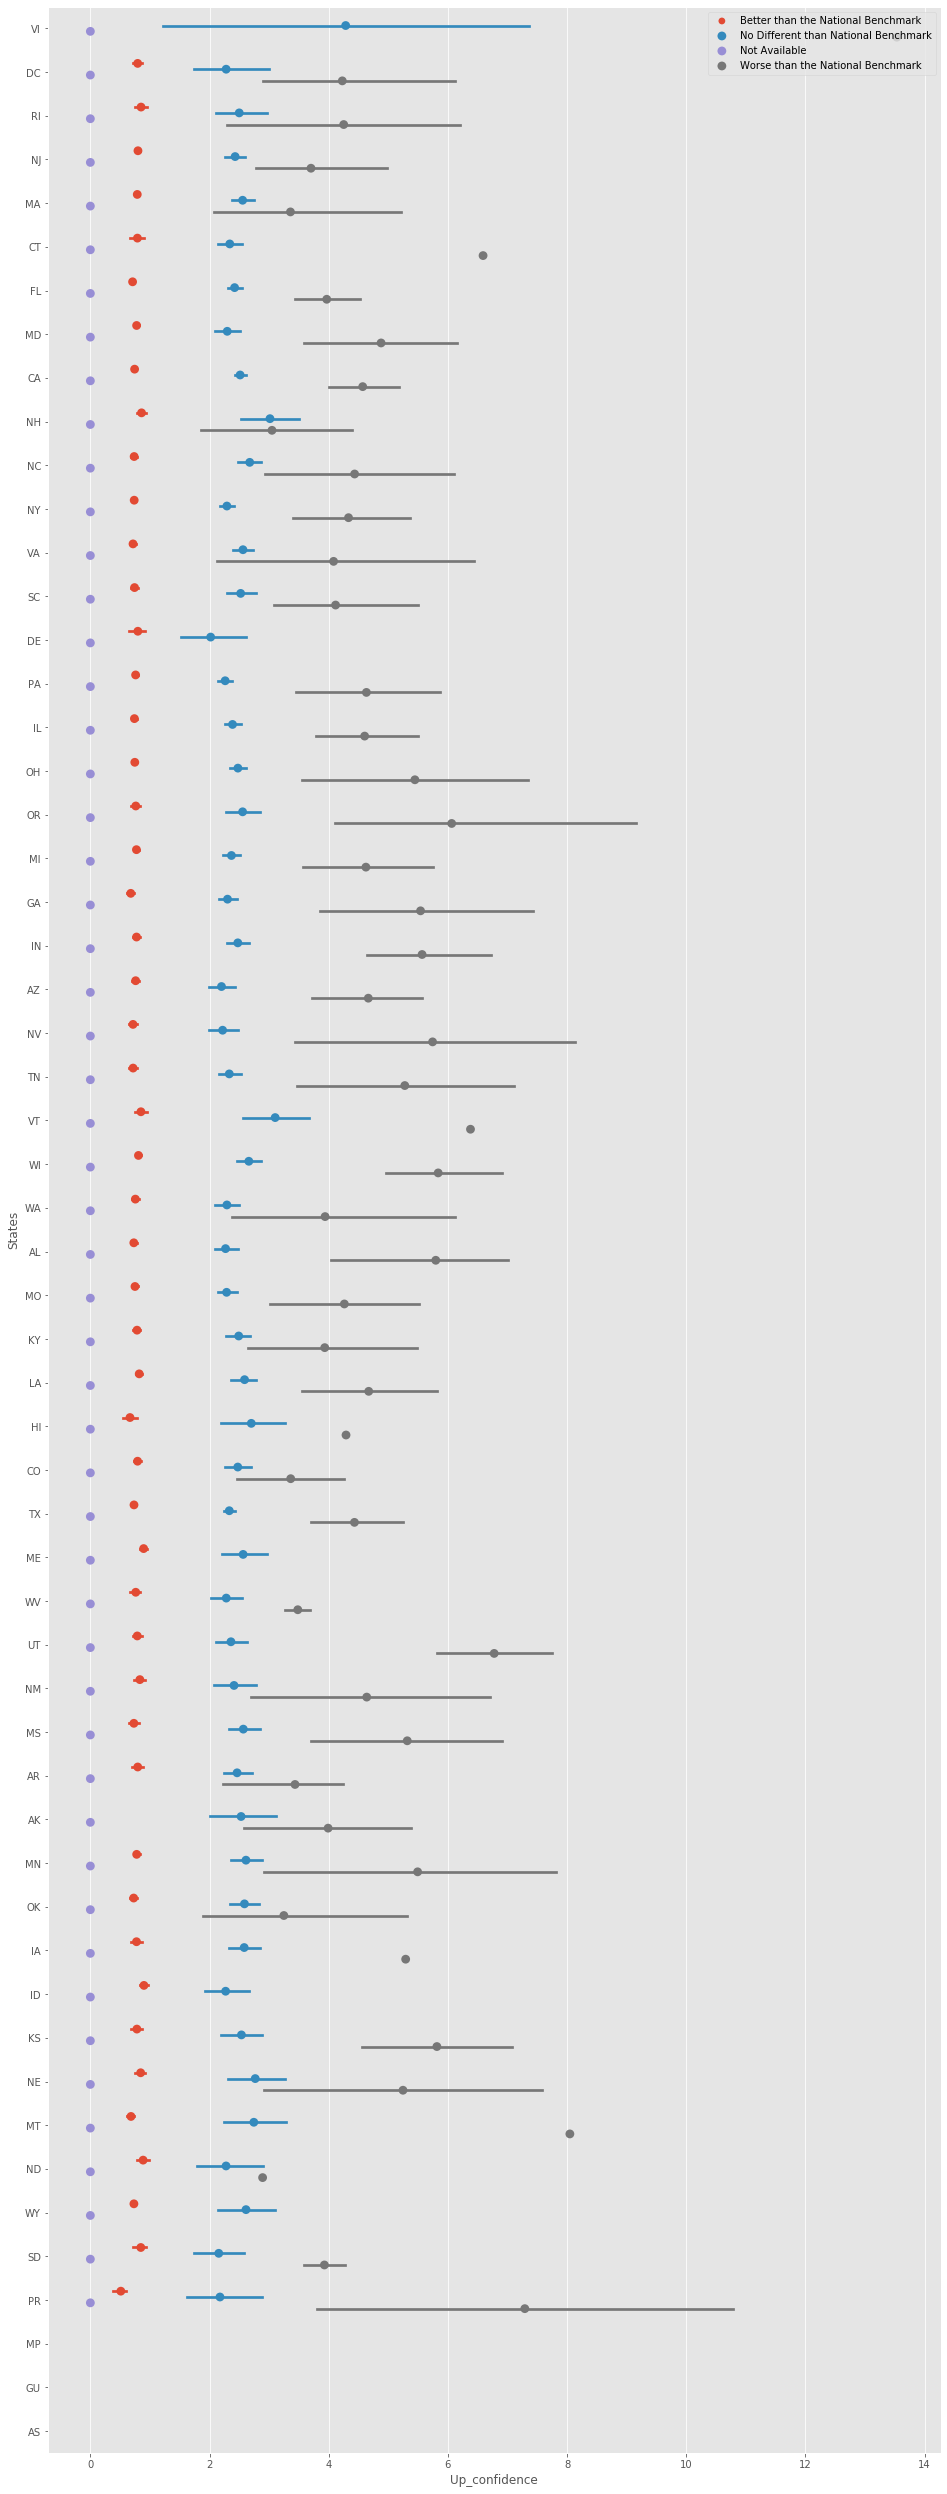

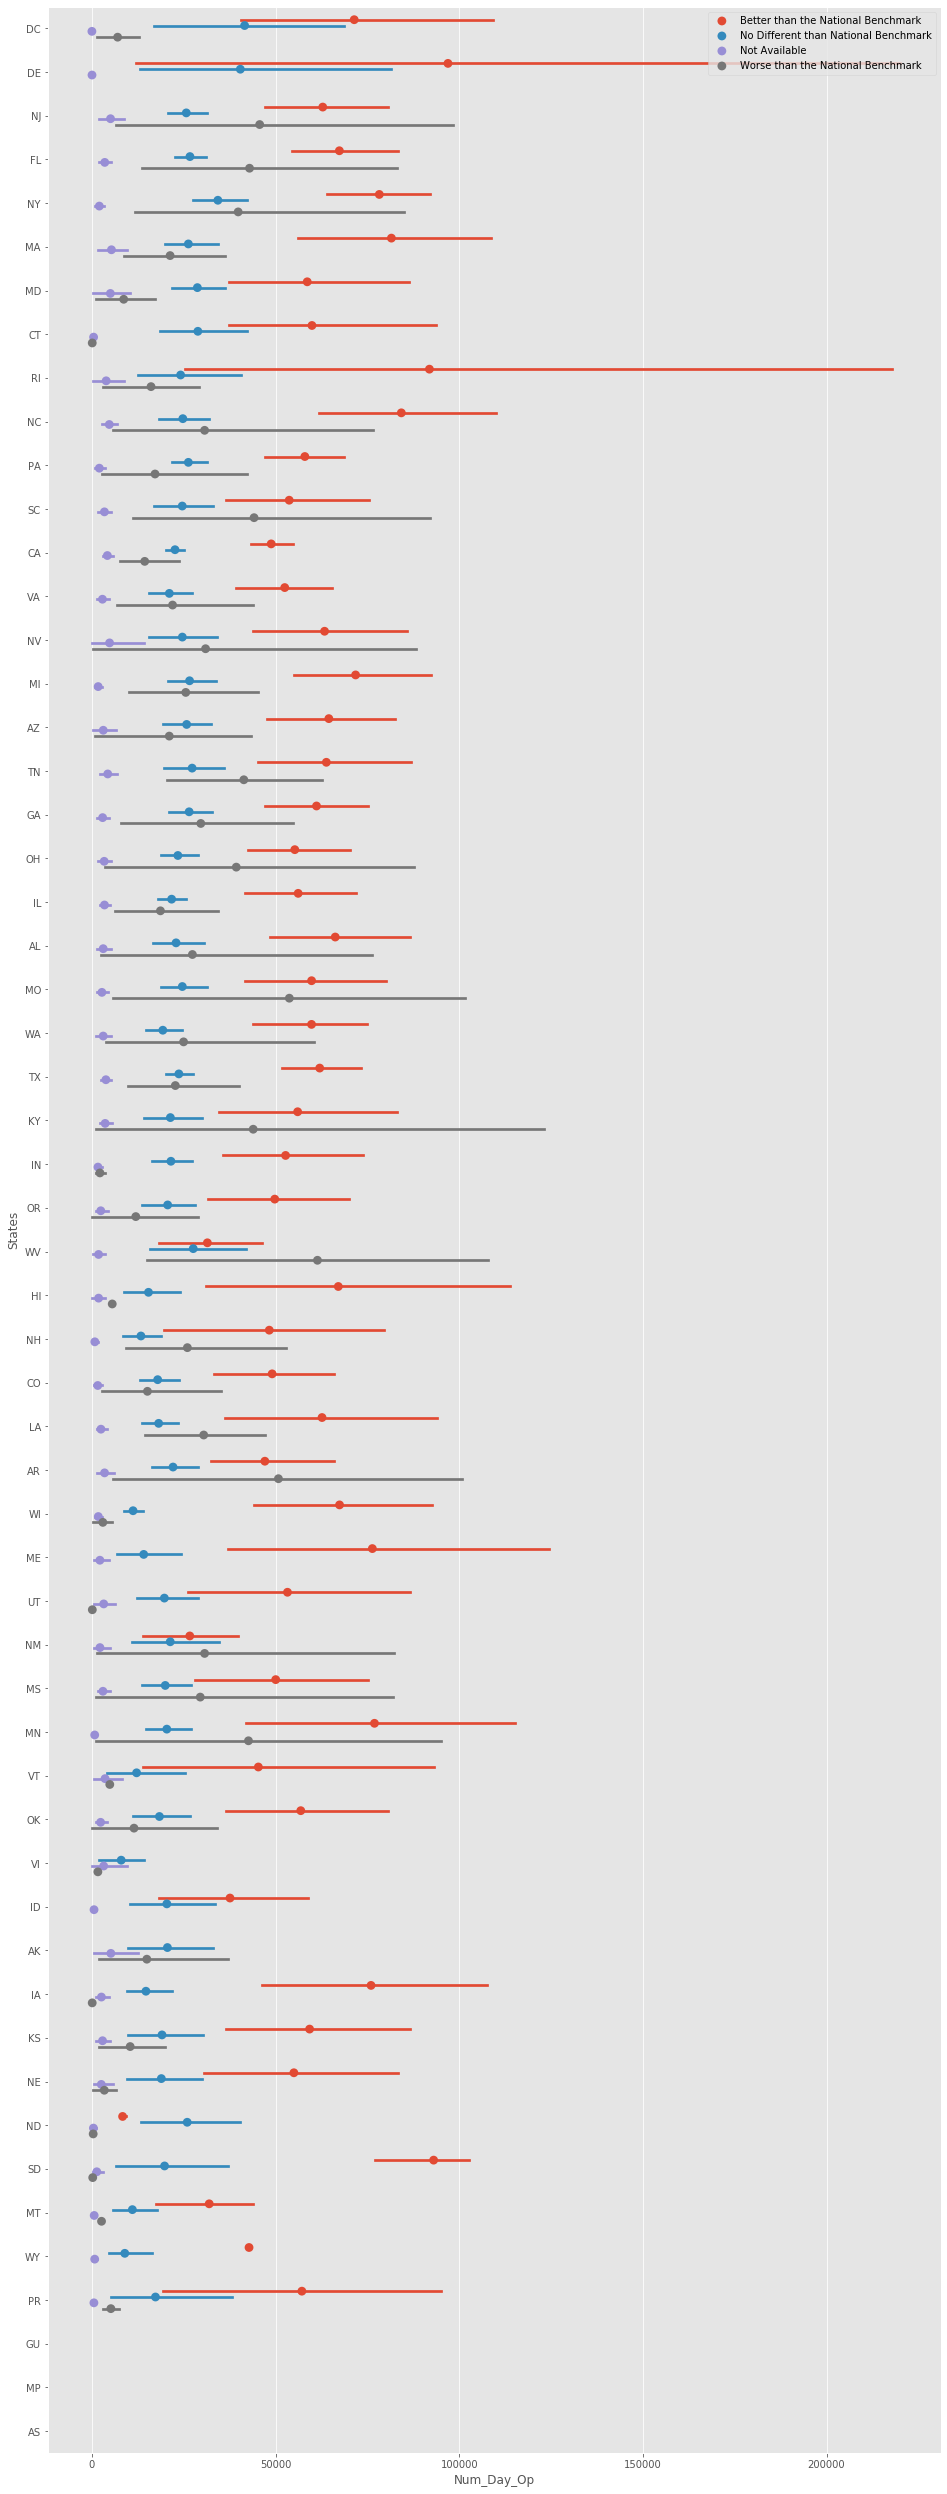

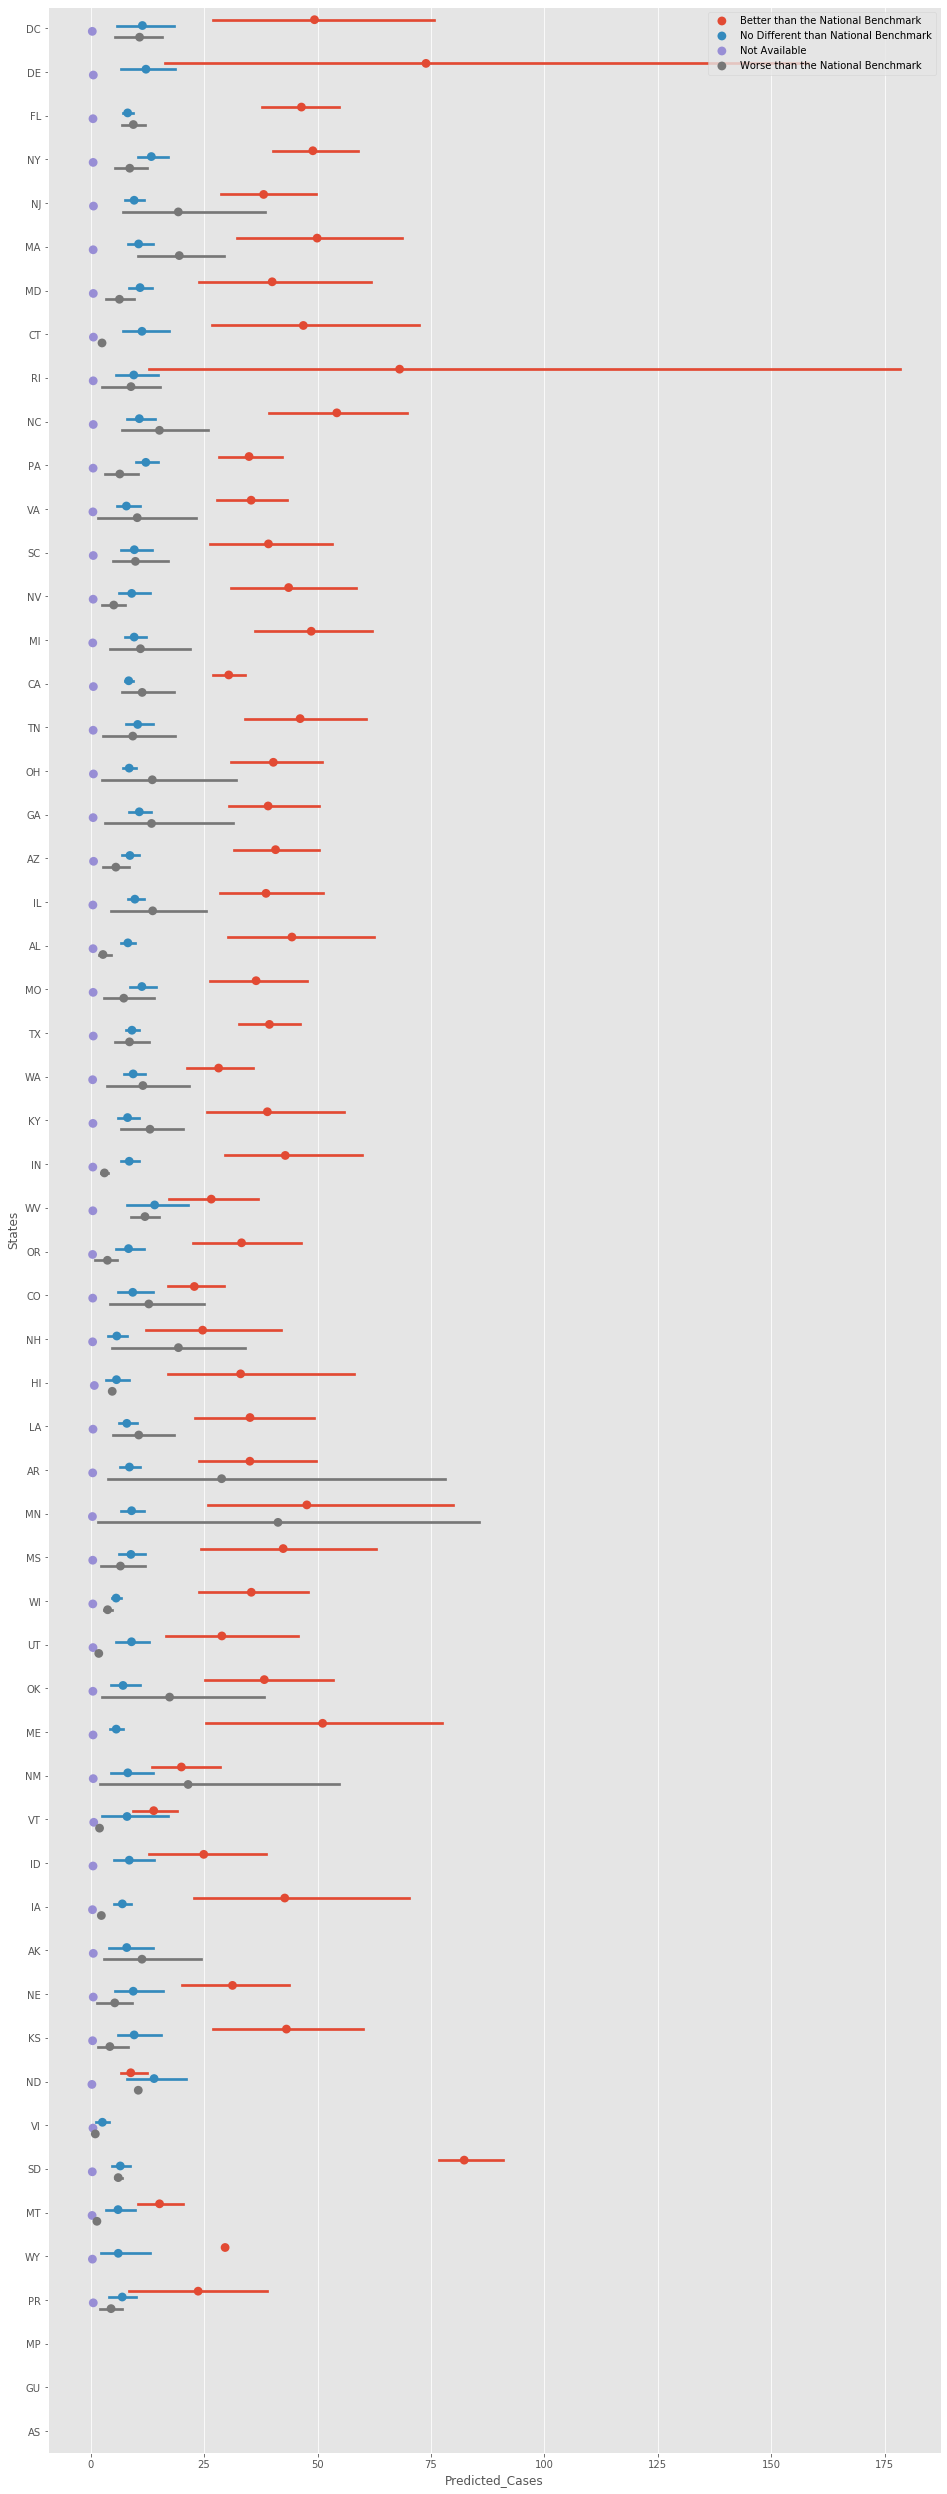

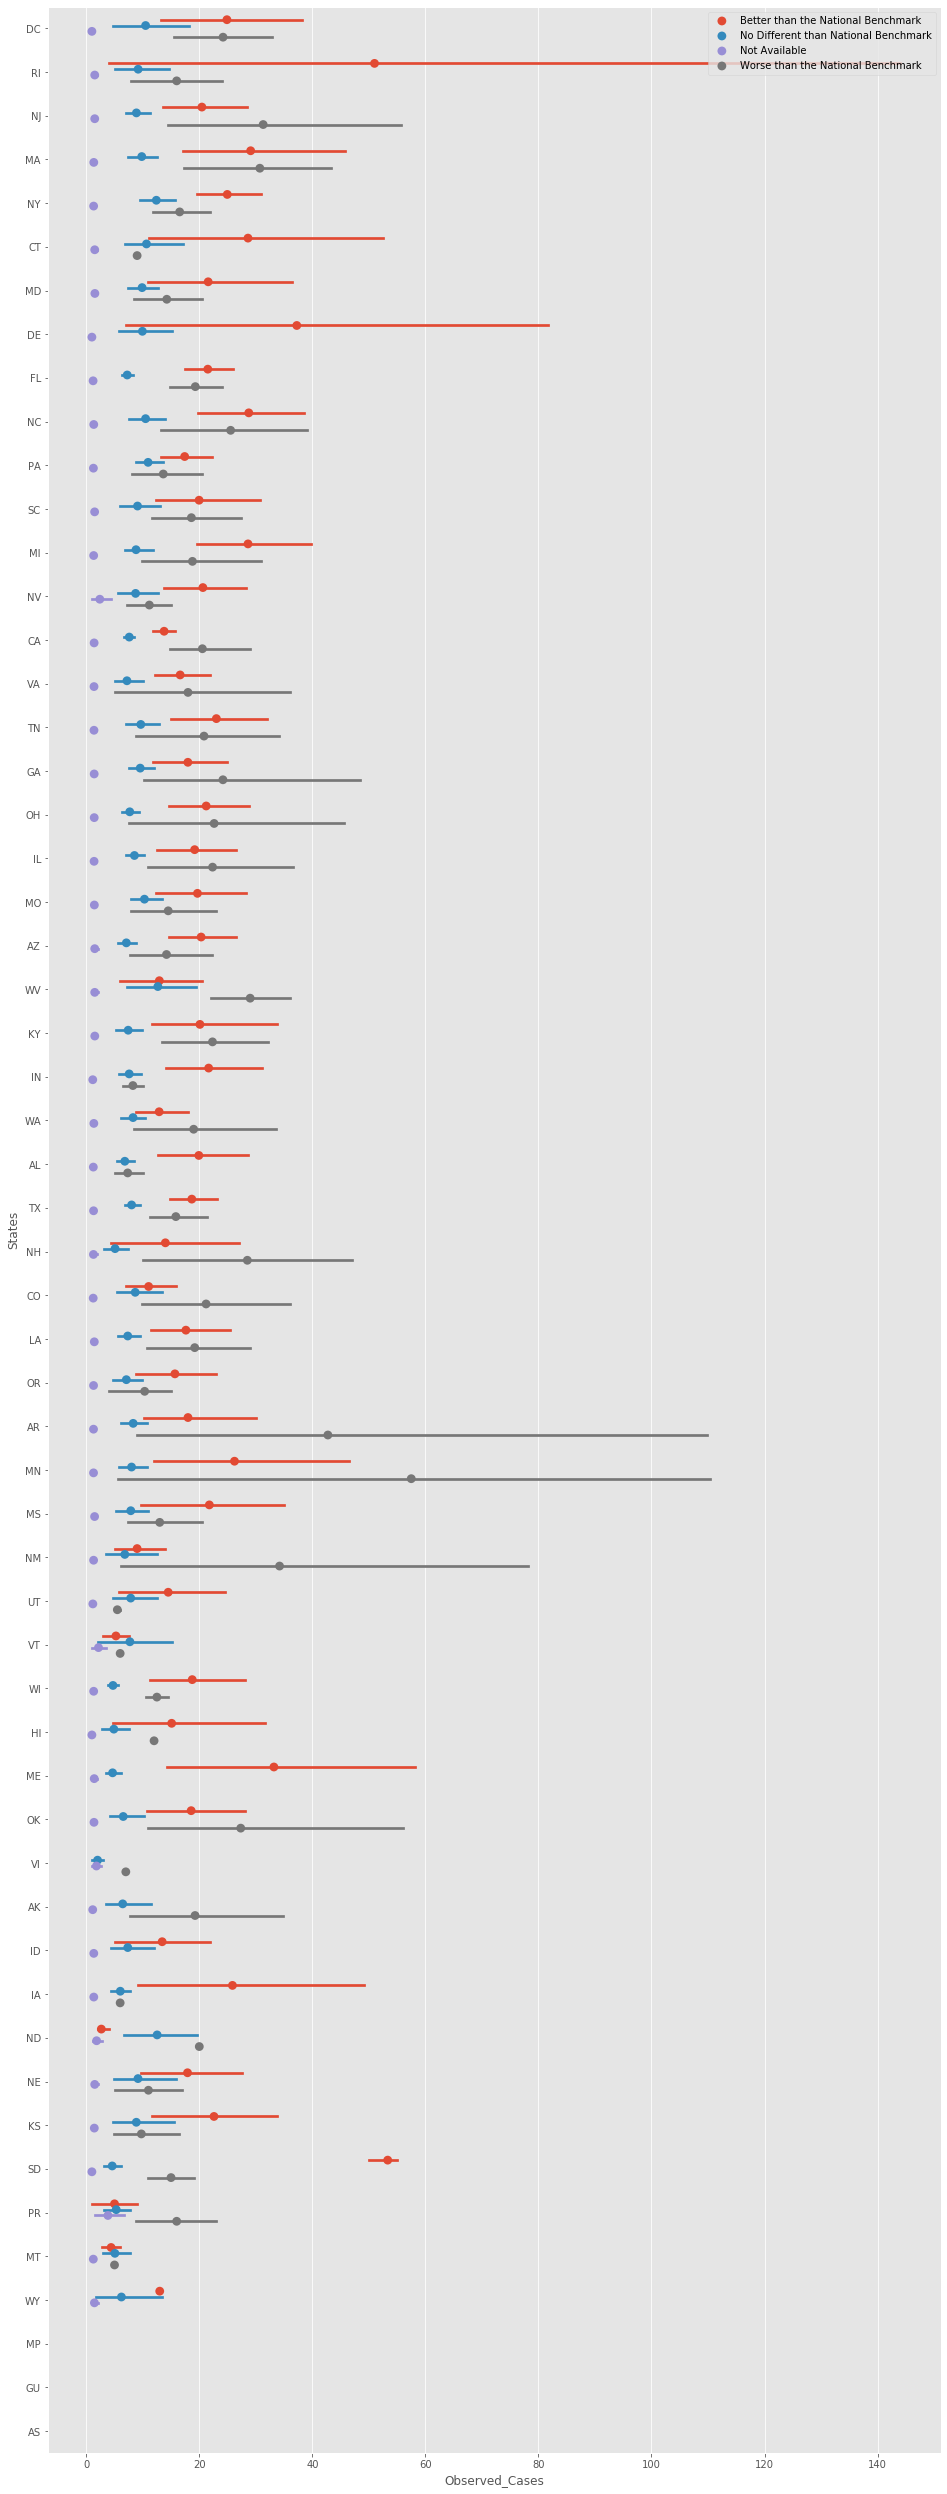

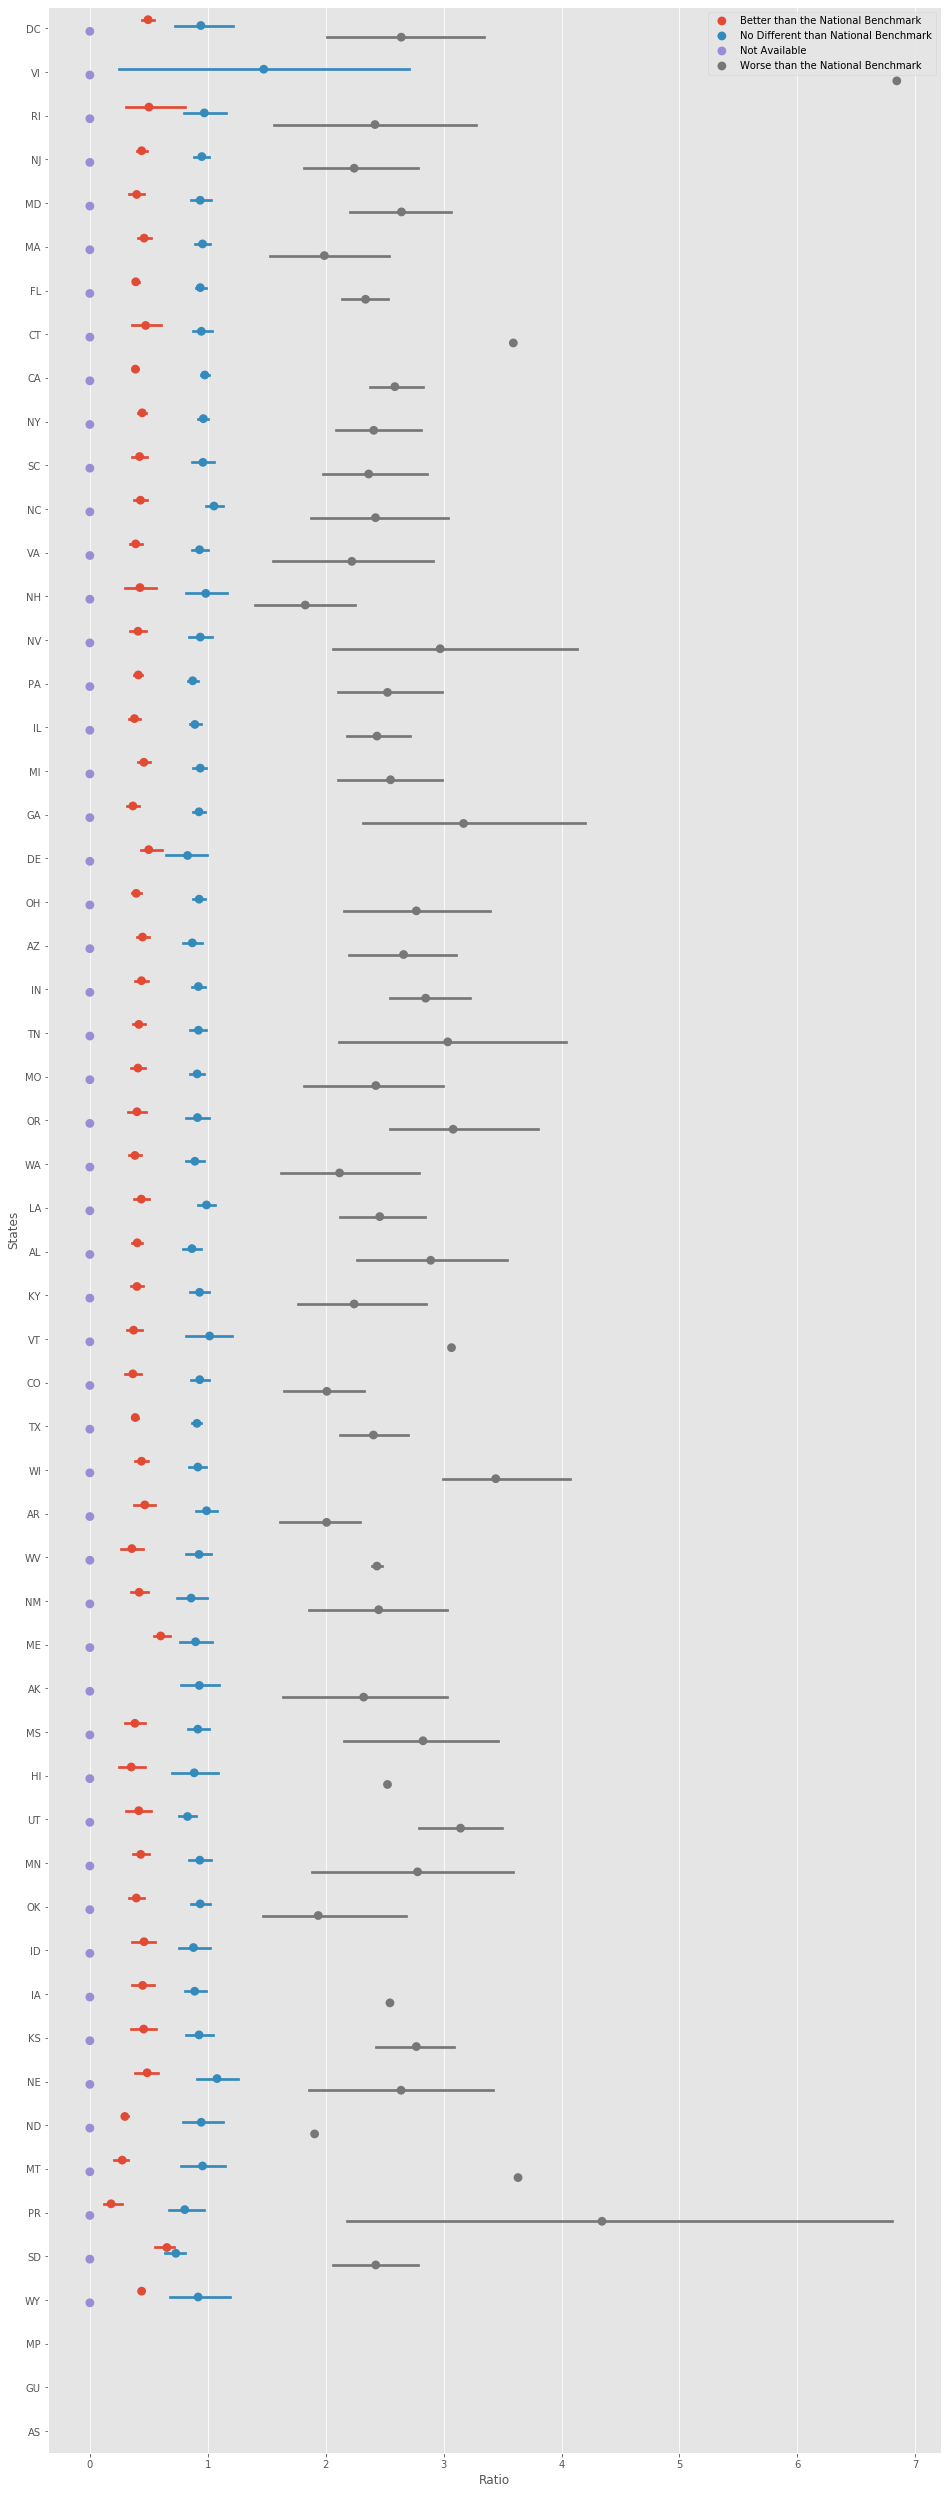

In [272]:
for var in numeric_vars:
    # taking the list of ordered states by var mean
    var_order = hospitals_mean.sort_values(by= var, ascending= False)[var].index
    plt.figure(figsize = [16,45])
    ax = sns.pointplot(data = positive_observations, x = var, y = 'State', hue = 'Compared_to_National',
                       order= var_order, linestyles = '', dodge = 0.4)
    plt.legend(loc= 'upper right')
    plt.ylabel('States')

plt.show()

The same trend that we noticed when we compared the numerical values per Measure ID and benchmark continue to be confirmed for each states as well.

<a id='conclusion'></a>
### Conclusion:

Healthcare-associated infections (HAIs) are infections people get while they're receiving health care for another condition. HAIs can happen in any health care facility, including hospitals, ambulatory surgical centers, end-stage renal disease facilities, and long-term care facilities. Bacteria, fungi, viruses, or other, less common pathogens can cause HAIs.


HAIs are a significant cause of illness and death — and they can have serious emotional, financial, and medical consequences. At any given time, about 1 in 25 inpatients have an infection related to hospital care. These infections lead to tens of thousands of deaths and cost the U.S. health care system billions of dollars each year.

After exploring our data we found that HAI_6 is the most common infection, and the HAI_3, HAI_4 are the least common.

If we can better predict the HAIs cases, we can be better prepared to avoid it and at least we won't have a larger observed cases, therefore We can say that the best hospitals are the ones with the lowest ratios, and the worst ones are those with the highest ratios.

Compared to the normal hospitals, the lower confidence level of the best benchmarked ones have less median and interquartile values, their maximum values are less than the normal max which is around 1. Contrarily the minimum of the Worst benchmarked hospitals is 1, their medians and IQR are higher and a much higher outliers. For the upper confidence level, The max of the best hospitals around the min of the normal ones and have a much smaller IQR, the min of the worst hospitals is around the median of the normal ones and have a higher IQR.

The Medians and interquartiles of the best benchmarked hospitals for the Number of patient days or operations and predicted cases are higher than the normal and the worst hospitals, however the observed cases are less than the predicted ones,therefore a lower ratio with a lower IQR values and a maximum not exceeding the normal median opposed to the worst hospitals who have a minimum ratio bigger than the normal Q3 upper quartile.

